# Prédire les résultats de Ligue 1 

Tout fan de foot s'est déjà demandé à quel point il est possible de prédire le résultat d'un match. S'il est impossible d'établir un modèle qui puisse le faire avec succès à tous les coups, en raison de l'aléa intrinsèque à une rencontre de sport, les paris sportifs existent pour une raison, il parait évident que certains indicateurs sont décisifs dans l'issue d'une rencontre. Il est bien connu que jouer à Domicile conduit à un taux de victoire plus élevé qu'à l'Extérieur, il parait évident que le classement des deux équipes joue aussi dans le résultat etc. Qui plus est, nous disposons aujourd'hui d'un nombre très important de données variées sur les matchs qui se jouent chaque semaine. Nous nous sommes donc demandés comment nous pourrions prédire au mieux les résultats de la Ligue 1 avec les données que nous pourrions scrapper sur Internet. L'idée de ce projet est de trouver une approche permettant de prédire au mieux la Ligue 1 en manipulant de nombreuses statistiques sur les matchs. Grâce à cela nous pourrons établir un 'niveau de prédictibilité' des rencontres

# Première approche

Dans un premier temps, nous allons tenter de prédire les résultats de Ligue 1 pour la saison en cours, à partir d'une base de donnée constituée de certaines données basiques sur l'ensemble des saisons depuis 2002-2003. Ces données seront, pour chaque match: la journée, le lieu du match, les deux équipes, le score, le classement des deux équipes. A partir de ces données nous allons pouvoir créer différents indicateurs comme la moyenne de buts marqués ou encore la forme des équipes et essayer de prédire les futures résultats. 

In [28]:
from fonctions import *
pd.set_option('display.max_columns', None)


## Scrapping des données 

Nous commençons par scrapper nos données. Nous scrappons d'abord l'ensemble des résultats sur le site *fbref.com*. Nous créons à partir de ce scrapping un **DataFrame** avec 7 colonnes:

la saison, la journée, l'équipe domicile, l'équipe extérieur, le nombre de buts de l'équipe domicile, le nombre de buts de l'équipe extérieure et le résultat (1 = victoire domicile, 0 = match nul, -1 = victoire extérieur)

On enregistre le **DataFrame** au format csv.

In [29]:
noms_colonnes = ['Saison','Journée','Domicile','Extérieur','Buts domicile','Buts extérieur','Résultat']     #on crée un dataframe vide qui contiendra tous les résultats de la Ligue 1 depuis 2002
dataframe_resultats = pd.DataFrame(columns=noms_colonnes)
for i in range (2002, 2023):                                                                                #on utilise la fonction précédente pour récupérer les résultats de chaque saison
    resultats_finaux, affiches = fonction_resultats(i)
    dataframe_resultats = dataframe_resultats._append(resultats_finaux, ignore_index=True)

dataframe_resultats.to_csv('Database/dataframe_résultats.csv', encoding = 'utf-8', index=False)              #on sauvegarde le dataframe des résultats de ligue 1 de 2002-2003 à 2022-2023 dans un fichier csv


/home/onyxia/work/Projet-python/fonctions.py:633: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0].dropna(subset = 'Wk').dropna(subset = 'Score').reset_index(drop=True)
/home/onyxia/work/Projet-python/fonctions.py:633: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0].dropna(subset = 'Wk').dropna(subset = 'Score').reset_index(drop=True)
/home/onyxia/work/Projet-python/fonctions.py:633: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0].dropna(subset = 'Wk').dropna(subset = 'Score').reset_index(drop=True)
/home/onyxia/work/Projet-pyt

## Création du **DataFrame** final pour l'implémentation de modèles prédictifs

A partir de ce **DataFrame**, nous créons un nouveau **DataFrame** avec l'ensemble des informations que nous souhaitions avoir pour tenter de prédire les résultats futurs. Nous remplaçons `Equipe à Domicile`, `Equipe à l'extérieur` par `Equipe 1`, `Equipe 2`, nous ajoutons une colonne valant si l'Equipe 1 est à domicile, 0 sinon, et nous créons un double de notre **DataFrame** en inversant Equipe 1 et Equipe 2, puis nous ajoutons les deux **DataFrame** de sorte à avoir, pour chaque équipe, l'ensemble de ses matchs en tant qu'Equipe 1. Ensuite nous ajoutons le classement à chaque journée des équipes de sorte à avoir pour chaque match le classement des deux équipes avant le match. 

Nous créons alors les colonnes suivantes : `Moyenne buts marqués par 1`, `Moyennes buts marqués par 2`, `Moyenne buts marqués par 1 à domicile`, `Moyenne buts marqués par 1 à l'extérieur`, `Moyenne buts marqués par 2 à domicile`, `Moyenne buts marqués par 2 à l'extérieur`, `Moyenne buts encaissés par 1`, `Moyenne buts encaissés par 2`,`Moyenne buts encaissés par 1 à domicile`, `Moyenne buts encaissés par 1 à l'extérieur`, `Moyenne buts encaissés par 2 à domicile`, `Moyenne buts encaissés par 2 à l'extérieur`, `Forme Equipe 1`, `Forme Equipe 2` et  `Historique des confrontations`. La forme est un indicateur sur les 5 derniers matchs d'une équipe dans la saison, simplement en faisant la somme des résultats. 

*Avec notre fonction nous pouvons choisir d'avoir les indicateurs avant ou après le match. Le **DataFrame** avec les indicateurs avant le match nous sera utile pour les prédictions. Celui après le match est plus adapté aux statistiques descriptives puisqu'il n'y a pas la perte de donnée du dernier match de chaque saison.*

In [ ]:
dataframe_resultats = pd.read_csv('Database/dataframe_résultats.csv', encoding = 'utf-8')     #on récupère le dataframe des résultats de ligue 1 de 2002-2003 à 2022-2023
dataframe_stats = fonction_prepa_base(dataframe_resultats, 0)   #On applique la fonction précédente pour avoir notre dataframe qui nous servira pour les statistiques descriptives
dataframe_resultats = pd.read_csv('Database/dataframe_résultats.csv', encoding = 'utf-8')     
dataframe_final = fonction_prepa_base(dataframe_resultats, 1)   #On applique la fonction précédente pour avoir notre dataframe qui nous servira pour les modèles 

dataframe_final.to_csv('Database/dataframe_final.csv', encoding = 'utf-8', index=False)  #On sauvegarde le dataframe dans un fichier csv


## Statistiques descriptives 

Dans cette première approche nous avons beaucoup d'observations mais assez peu de variables en comparaison avec notre deuxième approche. Nous pouvons tout de même visualiser quelques statistiques descriptives. 

*On peut d'abord regarder à quoi ressemble nos deux **DataFrames***

In [ ]:
dataframe_stats.head(38)

In [ ]:
dataframe_final.head(10)

*Affichons ensuites les occurences du nombre de buts marqués par match par les équipe sur toutes les saisons*

In [ ]:
display(dataframe_stats.groupby(['Saison'])['Buts Equipe 1'].value_counts().unstack().fillna(0).astype(int))

*Puis par équipe*

In [ ]:
display(dataframe_stats.groupby(['Equipe 1'])['Buts Equipe 1'].value_counts().unstack().fillna(0).astype(int))

*Affichons le nombre de journées occupées à chaque place par chaque équipe*

In [ ]:
display(dataframe_stats.groupby(['Equipe 1'])['Classement Equipe 1'].value_counts().unstack().fillna(0).astype(int))

*Affichons les résultats de chaque équipe*

In [ ]:
display(dataframe_stats.groupby('Equipe 1')['Résultat'].value_counts().unstack().fillna(0).astype(int))

*Affichons les résultats en fonction du classement avant le match*

In [ ]:
resultats_counts =  dataframe_final.groupby('Classement Equipe 1')['Résultat'].value_counts().unstack().fillna(0).astype(int)
resultats_counts.columns = ['Défaite', 'Nul', 'Victoire']
display(resultats_counts)

*Affichons les résultats en fonction de Domicile/Extérieur*

In [ ]:
display(dataframe_stats.groupby('Lieu')['Résultat'].value_counts().unstack().fillna(0).astype(int))

*Affichons le nombre de buts marqué en fonction de Domicile/Extérieur*

In [ ]:
display(dataframe_stats.groupby('Lieu')['Buts Equipe 1'].value_counts().unstack().fillna(0).astype(int))

*Affichons les résultats en fonction de la forme des équipes avant le match.*

*La valeur de forme est égale à (nombre de victoires - nombre de défaites) sur les 5 derniers matchs*

In [ ]:
resultats_counts =  dataframe_final.groupby('Forme 1')['Résultat'].value_counts().unstack().fillna(0).astype(int)
resultats_counts.columns = ['Défaite', 'Nul', 'Victoire']
display(resultats_counts)

*Affichons un tableau à double entrée des historiques entre les équipes.*

*La valeur affichée représente (nombre de victoires - nombre de défaites) de l'Equipe 1 contre l'Equipe 2*

In [ ]:
display(pd.pivot_table(dataframe_stats, values='Historique', index='Equipe 1', columns='Equipe 2', aggfunc='last').fillna(0).astype(int))

## Quelques graphiques

*Regardons pour commencer l'évolution du nombre de buts par saison*

In [ ]:
buts_par_saison = dataframe_stats.groupby('Saison')['Buts Equipe 1'].sum().reset_index()

plt.figure(figsize=(30, 6))
plt.plot(buts_par_saison['Saison'], buts_par_saison['Buts Equipe 1'], marker='o', linestyle='-')
plt.title('Nombre de buts par saison')
plt.xlabel('Saison')
plt.ylabel('Nombre total de buts')
plt.grid(True)
plt.show()

*On peut ensuite discriminer en fonction de Domicile/Extérieur et regarder les moyennes au lieu du total*

In [ ]:
buts_par_saison = dataframe_stats[dataframe_stats['Lieu']=='Domicile'].groupby('Saison')['Buts Equipe 1'].mean().reset_index()

plt.figure(figsize=(30, 6))
plt.plot(buts_par_saison['Saison'], buts_par_saison['Buts Equipe 1'], marker='o', linestyle='-')
plt.title('Nombre de buts par match à domicile par saison')
plt.xlabel('Saison')
plt.ylabel('Nombre moyen de buts')
plt.grid(True)
plt.show()

buts_par_saison = dataframe_stats[dataframe_stats['Lieu']=='Extérieur'].groupby('Saison')['Buts Equipe 1'].mean().reset_index()

plt.figure(figsize=(30, 6))
plt.plot(buts_par_saison['Saison'], buts_par_saison['Buts Equipe 1'], marker='o', linestyle='-')
plt.title('Nombre de buts par match à l\'extérieur par saison')
plt.xlabel('Saison')
plt.ylabel('Nombre moyen de buts')
plt.grid(True)
plt.show()

On note une tendance globale à la hausse du nombre de buts marqués par match. Cette tendance est plus marqué à l'Extérieur qu'à Domicile. L'année 2019-2020 est l'année Covid ce qui explique la valeur totale de buts. 

*Regardons ensuite le nombre de buts par équipe sur la période*

In [ ]:
buts_par_equipe = dataframe_stats.groupby('Equipe 1')['Buts Equipe 1'].sum().reset_index()

buts_par_equipe = buts_par_equipe.sort_values(by='Buts Equipe 1', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(buts_par_equipe['Equipe 1'], buts_par_equipe['Buts Equipe 1'], color='blue')
plt.title('Buts par équipe')
plt.xlabel('Équipe')
plt.ylabel('Nombre total de buts')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

buts_par_equipe = dataframe_stats.groupby('Equipe 1')['Buts Equipe 1'].mean().reset_index()

buts_par_equipe = buts_par_equipe.sort_values(by='Buts Equipe 1', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(buts_par_equipe['Equipe 1'], buts_par_equipe['Buts Equipe 1'], color='blue')
plt.title('Moyenne de buts par match par équipe')
plt.xlabel('Équipe')
plt.ylabel('Nombre moyen de buts')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

Sans beaucoup de surprise le PSG, qui domine le championnat depuis 2012, et l'OL, qui l'a dominé dans les années 2000, ont les meilleures moyennes de buts marqués. Les moyennes les plus faibles sont pour des équipes qui ont connu des relations en Ligue 2 et qui pour certaines, ont disputé une seule saison en Ligue 1

*On peut aussi regarder le nombre de points sur la période (Victoire = 3, Nul = 1, Défaite = 0)*

In [ ]:
df_plot = dataframe_stats.copy()
df_plot['Résultat'] = df_plot['Résultat'].replace({'Défaite': 0, 'Nul': 1, 'Victoire': 3})

buts_par_equipe = df_plot.groupby('Equipe 1')['Résultat'].sum().reset_index()

buts_par_equipe = buts_par_equipe.sort_values(by='Résultat', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(buts_par_equipe['Equipe 1'], buts_par_equipe['Résultat'], color='blue')
plt.title('Points par équipe')
plt.xlabel('Équipe')
plt.ylabel('Nombre total de points')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

df_plot = dataframe_stats.copy()
df_plot['Résultat'] = df_plot['Résultat'].replace({'Défaite': 0, 'Nul': 1, 'Victoire': 3})

buts_par_equipe = df_plot.groupby('Equipe 1')['Résultat'].mean().reset_index()

buts_par_equipe = buts_par_equipe.sort_values(by='Résultat', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(buts_par_equipe['Equipe 1'], buts_par_equipe['Résultat'], color='blue')
plt.title('Moyenne de points par journée par équipe')
plt.xlabel('Équipe')
plt.ylabel('Nombre moyen de points')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

Ici la hiérarchie est la même sans surprise. La moyenne de point est fortement corrélée à la moyenne de buts marqués

*Regardons le pourcentage de Victoire à Domicile. Pour l'extérieur il suffit d'inverser Victoire et Défaite*

In [ ]:
df_plot = dataframe_stats.copy()

result_counts = df_plot[df_plot['Lieu']=='Domicile']['Résultat'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'gray', 'blue'])
plt.title('Résultats des matchs à domicile')
plt.show()

45% des matchs à Domicile se soldent par une victoire contre seulement 26.9% des matchs à l'extérieur. Jouer à Domicile est donc un avantage réelement significatif. Cela pourra être vérifié dans notre modélisation

*On peut aussi regarder le pourcentage de Victoire contre des équipes moins bien classées*

In [ ]:
df_plot = dataframe_final.copy()
df_plot['Résultat'] = df_plot['Résultat'].replace({-1: 'Défaite', 0: 'Nul', 1: 'Victoire'})
result_counts = df_plot[df_plot['Classement Equipe 1']<=df_plot['Classement Equipe 2']]['Résultat'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'gray', 'blue'])
plt.title('Résultats avec avantage au classement')
plt.show()

Etre mieux classé que son adversaire est aussi un avantage puisque 43.7% des équipes mieux classés que leur adversaire remportent le match. Le classement est donc aussi un facteur déterminant.

*Analysons maintenant les occurences des scores avec deux méthodes différentes*

In [ ]:
df_plot = dataframe_stats.copy()
df_plot['Score'] = df_plot.apply(lambda row: max(row['Buts Equipe 1'], row['Buts Equipe 2']), axis=1).astype(str) + ' - ' + df_plot.apply(lambda row: min(row['Buts Equipe 1'], row['Buts Equipe 2']), axis=1).astype(str) 
scores_categories = pd.Categorical(df_plot['Score'], categories=df_plot['Score'].unique(), ordered=True)

score_counts = df_plot[df_plot['Lieu'] == 'Domicile']['Score'].value_counts()

plt.figure(figsize=(30, 12))
plt.bar(range(len(score_counts)), score_counts, color='skyblue', edgecolor='black')
plt.title('Score des matchs')
plt.xticks(range(len(score_counts)), score_counts.index, rotation=45, ha='right')
plt.xlabel('Score du match')
plt.ylabel('Nombre de matchs')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

result_counts = df_plot[df_plot['Lieu']=='Domicile']['Score'].value_counts()
result_counts_grouped = result_counts.copy()
result_counts_grouped['Autre'] = result_counts[result_counts < 150].sum() 
result_counts_grouped = result_counts_grouped[result_counts_grouped >= 150]

plt.figure(figsize=(10, 10))
plt.pie(result_counts_grouped, labels=result_counts_grouped.index, autopct='%1.1f%%', startangle=90, colors=['limegreen', 'cornflowerblue', 'wheat'])
plt.title('Score des matchs')
plt.show()

On peut aussi voir que 4 scores (1-0, 2-0, 2-1, 1-1) recouvrent plus de 50% des scores de nos matchs. Le 1-0 est le score le plus probables avec près de 20% d'occurence.

*On peut enfin faire un graph en barres du nombre de buts totals par match*

In [ ]:
df_plot['Total Buts'] = df_plot['Buts Equipe 1'] + df_plot['Buts Equipe 2']

total_buts_counts = df_plot['Total Buts'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(total_buts_counts.index, total_buts_counts, color='lightcoral', edgecolor='black')

plt.title('Nombre total de buts par match')
plt.xlabel('Total des buts par match')
plt.ylabel('Nombre de matchs')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Dans la majorité des matchs moins de 5 buts sont marqués avec un maximum pour le total de 2 buts, qui regroupent deux scores: 1-1 et 2-0. Le maximum de but sur un match de la période est 9

## Modélisation pour la Prédiction de Résultats de Football

Dans cette étape, nous allons développer trois modèles statistiques distincts, chacun avec une configuration spécifique des variables indépendantes et dépendantes, adaptés à la prédiction de résultats de matchs de football et du nombre de buts marqués. Les modèles sélectionnés sont : **Régression Linéaire**, **Random Forest** et **SVM (Support Vector Machine)**.

### Choix des Modèles et Leur Pertinence

1. **Random Forest** : Ce modèle est choisi pour sa capacité exceptionnelle à traiter des ensembles de données hétérogènes et complexes, ce qui est typique dans le contexte du football. Sa force réside dans la gestion efficace de multiples variables et la modélisation de relations non linéaires, essentielles pour capturer la dynamique d'un match de football. Sa robustesse face aux anomalies en fait un outil fiable pour notre analyse.

2. **Régression Linéaire** : La simplicité et la clarté d'interprétation de ce modèle en font un choix judicieux. Il permet d'évaluer comment chaque variable, telle que la possession de balle ou le nombre de tirs, influence le résultat final du match et le nombre de buts. Cela nous aide à comprendre le poids relatif de chaque facteur dans la performance d'une équipe.

3. **SVM (Support Vector Machine)** : SVM est particulièrement utile pour distinguer des catégories complexes, où les relations entre les caractéristiques ne sont pas évidentes. Contrairement à la régression linéaire, il est capable de créer des frontières de décision claires même lorsque les relations entre les variables ne sont pas linéaires, ce qui est souvent le cas dans les jeux de données de football.

### Stratégie de Division des Données

Pour maximiser la performance et la généralisabilité de nos modèles, nous utilisons la méthode train_test_split. Elle divise les données en deux ensembles : un pour l'entraînement du modèle et l'autre pour le tester, ce qui contribue à prévenir le surajustement et à assurer une bonne prédiction sur de nouvelles données.

### Mise en Œuvre des Modèles

Nous appliquerons ces modèles en prenant comme variables dépendantes le **Résultat du Match** (victoire, nul, défaite) et le **Nombre de Buts** marqués par chaque équipe. Les autres données numériques, telles que les statistiques de match et le classement, serviront de variables indépendantes. Nous transformerons certaines variables, comme le classement, en leur inverse (1/classement) pour une meilleure intégration dans le modèle. En outre, nous accorderons plus de poids aux matchs plus récents dans la saison, car les données de début de saison sont souvent moins indicatives de la performance actuelle des équipes.

Ici nous essayons de prédire le résultat: 

In [ ]:
# Lecture du fichier CSV et nettoyage des données
dataframe_regression = pd.read_csv('Database/dataframe_final.csv', encoding='utf-8').dropna()

# Inversion du classement pour les deux équipes
dataframe_regression[['Classement Equipe 1', 'Classement Equipe 2']] = dataframe_regression[['Classement Equipe 1', 'Classement Equipe 2']].apply(lambda x: 1/x)

# Sélection des variables indépendantes en excluant certaines colonnes
features_to_exclude = ['Equipe 1', 'Equipe 2', 'Saison', 'Journée', 'Buts Equipe 1', 'Buts Equipe 2', 'Résultat']
X = dataframe_regression.drop(features_to_exclude, axis=1)

# Application des modèles et récupération des prédictions
Y_test, Y_pred, Y_pred2, Y_pred3, Y_pred4 = fonction_appli_modeles(dataframe_regression, X)


**Analyse des Performances des Modèles de Prédiction dans le Football**

Nous constatons que les coefficients de détermination (R-squared) de nos modèles de régression sont relativement bas, ce qui suggère une capacité limitée à expliquer la variance des résultats des matchs de football. Parmi les variables, `Equipe 1 à Domicile`, `Classements Equipe 1`, et `Classements Equipe 2` se distinguent par leur influence significative, comme le montrent leurs coefficients importants et leurs p-values très faibles.

En termes de précision des prédictions, nos modèles se situent dans une fourchette modeste de 47% à 50,15%. Notamment, le modèle qui prédit le nombre de buts marqués par chaque équipe se révèle être le plus performant. Cependant, ce modèle a une limitation majeure : il ne permet pas de prédire un résultat nul. L'introduction d'un seuil pour prédire un match nul en cas de faible différence entre les scores n'a pas non plus amélioré significativement les résultats.

Ces niveaux de performance, bien que modestes, sont compréhensibles compte tenu de l'incertitude inhérente au football. Néanmoins, il reste un espace pour améliorer ces modèles. Des ajustements dans la sélection des variables, la méthodologie de modélisation, ou l'incorporation de données supplémentaires pourraient potentiellement conduire à des prédictions plus précises. 

On peut faire une tentative de pondération des modèles pour en sortir une prédiction plus précise. On teste donc différents poids associés aux modèles.

In [ ]:
# Initialisation des poids
n = 0
best_weights = {'poids_modele1': 0, 'poids_modele2': 0, 'poids_modele3': 0, 'poids_modele4': 0, 'k': 0}

# Conversion des prédictions en tableaux NumPy
Y_preds = [np.array(Y_pred), np.array(Y_pred2), np.array(Y_pred3), np.array(Y_pred4)]

# Boucle imbriquée pour itérer sur les poids des modèles et le seuil k
for poids_modele1, poids_modele2, poids_modele3, poids_modele4, k in np.ndindex((10, 10, 10, 10, 10)):
    poids_modele1 *= 0.2
    poids_modele2 *= 0.2
    poids_modele3 *= 0.2
    poids_modele4 *= 0.2
    k *= 0.2

    # Calcul du résultat final pondéré
    resultat_final_pondere = sum(w * pred for w, pred in zip([poids_modele1, poids_modele2, poids_modele3, poids_modele4], Y_preds))
    resultat_final = [1 if x > k else -1 if x < -k else 0 for x in resultat_final_pondere]

    # Calcul de la précision
    bon_résultat = [a == b for a, b in zip(resultat_final, Y_test)]
    accuracy = sum(bon_résultat) / len(bon_résultat)

    # Mise à jour des meilleurs poids si une meilleure précision est trouvée
    if accuracy > n:
        n = accuracy
        best_weights = {'poids_modele1': poids_modele1, 'poids_modele2': poids_modele2, 'poids_modele3': poids_modele3, 'poids_modele4': poids_modele4, 'k': k}

# Affichage des meilleurs poids et de la précision
print('Meilleurs poids et seuil: ', best_weights)
print('Précision: ', n)


*L'amélioration n'est pas significative voire absente selon les ensembles d'entrainement et de test choisis. Tentons de changer nos variables explicatives.*

**Modification des Variables Explicatives**

Dans notre démarche d'affiner nos modèles de prédiction, nous allons revoir les variables explicatives utilisées. Cette étape implique l'ajout de nouvelles colonnes spécifiques à notre jeu de données. Ces colonnes sont :

- `BM Equipe 1 à D si D` : Buts marqués par l'Équipe 1 à domicile (D), si le match se joue à domicile.
- `BM Equipe 1 à E si E` : Buts marqués par l'Équipe 1 à l'extérieur (E), si le match se joue à l'extérieur.
- `BE Equipe 1 à D si D` : Buts encaissés par l'Équipe 1 à domicile, si le match se joue à domicile.
- `BE Equipe 1 à E si E` : Buts encaissés par l'Équipe 1 à l'extérieur, si le match se joue à l'extérieur.
- `BM Equipe 2 à D si D` : Buts marqués par l'Équipe 2 à domicile, si le match se joue à domicile.
- `BM Equipe 2 à E si E` : Buts marqués par l'Équipe 2 à l'extérieur, si le match se joue à l'extérieur.
- `BE Equipe 2 à D si D` : Buts encaissés par l'Équipe 2 à domicile, si le match se joue à domicile.
- `BE Equipe 2 à E si E` : Buts encaissés par l'Équipe 2 à l'extérieur, si le match se joue à l'extérieur.

Ces colonnes reprennent les valeurs des colonnes existantes correspondantes, mais sont configurées pour afficher une valeur de 0 si le lieu du match (à domicile ou à l'extérieur) ne correspond pas à la situation décrite dans la colonne. Cette approche vise à affiner notre analyse en tenant compte de la performance des équipes en fonction du lieu du match, un facteur potentiellement déterminant dans les résultats.

In [ ]:
# Chargement du fichier CSV contenant les données de football et suppression des lignes avec des valeurs manquantes
dataframe_regression = pd.read_csv('Database/dataframe_final.csv', encoding='utf-8').dropna()

# Ajout de nouvelles colonnes au DataFrame. Ces colonnes sont calculées en fonction du lieu du match (à domicile ou à l'extérieur)
# et des performances moyennes des équipes dans ces conditions. Chaque nouvelle colonne est conditionnelle selon que l'équipe 
# joue à domicile ou à l'extérieur.
dataframe_regression[['BM Equipe 1 à D si D', 'BM Equipe 1 à E si E', 'BE Equipe 1 à D si D', 'BE Equipe 1 à E si E',
                      'BM Equipe 2 à D si D', 'BM Equipe 2 à E si E', 'BE Equipe 2 à D si D', 'BE Equipe 2 à E si E']] = \
    dataframe_regression.apply(
        lambda row: [
            row['Equipe 1 à Domicile'] * row['Moyenne_BM par 1 à Domicile'],  # Buts marqués par l'équipe 1 à domicile
            (1 - row['Equipe 1 à Domicile']) * row['Moyenne_BM par 1 à Extérieur'],  # Buts marqués par l'équipe 1 à l'extérieur
            row['Equipe 1 à Domicile'] * row['Moyenne_BE par 1 à Domicile'],  # Buts encaissés par l'équipe 1 à domicile
            (1 - row['Equipe 1 à Domicile']) * row['Moyenne_BE par 1 à Extérieur'],  # Buts encaissés par l'équipe 1 à l'extérieur
            (1 - row['Equipe 1 à Domicile']) * row['Moyenne_BM par 2 à Domicile'],  # Buts marqués par l'équipe 2 à domicile
            row['Equipe 1 à Domicile'] * row['Moyenne_BM par 2 à Extérieur'],  # Buts marqués par l'équipe 2 à l'extérieur
            (1 - row['Equipe 1 à Domicile']) * row['Moyenne_BE par 2 à Domicile'],  # Buts encaissés par l'équipe 2 à domicile
            row['Equipe 1 à Domicile'] * row['Moyenne_BE par 2 à Extérieur']   # Buts encaissés par l'équipe 2 à l'extérieur
        ], axis=1, result_type='expand')

# Sélection des variables explicatives pour la modélisation. Les colonnes listées ici sont exclues car elles ne sont pas 
# utilisées comme variables explicatives.
features_to_exclude = ['Equipe 1', 'Equipe 2', 'Saison', 'Journée', 'Buts Equipe 1', 'Buts Equipe 2', 'Résultat']
X = dataframe_regression.drop(features_to_exclude, axis=1)

# Application des modèles de prédiction sur les données sélectionnées. 
fonction_appli_modeles(dataframe_regression, X)


**Réévaluation des Résultats et Nouvelle Approche de Modélisation**

Malgré nos efforts, les résultats obtenus avec les modifications actuelles ne montrent pas d'amélioration par rapport à nos tentatives précédentes. Par conséquent, nous avons décidé de ne pas procéder à une pondération des modèles dans ce contexte.

Dans une dernière tentative pour affiner nos modèles, nous allons opérer un changement dans la sélection des variables explicatives. Nous envisageons de supprimer les colonnes suivantes :

- `Moyenne_BM par 1 à Domicile`
- `Moyenne_BM par 1 à Extérieur`
- `Moyenne_BE par 1 à Domicile`
- `Moyenne_BE par 1 à Extérieur`
- `Moyenne_BM par 2 à Domicile`
- `Moyenne_BM par 2 à Extérieur`
- `Moyenne_BE par 2 à Domicile`
- `Moyenne_BE par 2 à Extérieur`

Ces colonnes, maintenant considérées comme redondantes ou potentiellement perturbatrices, sont écartées de notre analyse. Cette démarche vise à simplifier le modèle en éliminant des variables qui pourraient introduire de la confusion ou de la multicolinéarité.

In [ ]:
dataframe_regression = pd.read_csv('Database/dataframe_final.csv', encoding = 'utf-8').dropna()


dataframe_regression[['BM Equipe 1 à D si D', 'BM Equipe 1 à E si E', 'BE Equipe 1 à D si D', 'BE Equipe 1 à E si E', 'BM Equipe 2 à D si D',
                      'BM Equipe 2 à E si E', 'BE Equipe 2 à D si D', 'BE Equipe 2 à E si E']] = dataframe_regression.apply(
        lambda row: [row['Equipe 1 à Domicile'] * row['Moyenne_BM par 1 à Domicile'], (1 - row['Equipe 1 à Domicile']) * row['Moyenne_BM par 1 à Extérieur'], 
                     row['Equipe 1 à Domicile'] * row['Moyenne_BE par 1 à Domicile'], (1 - row['Equipe 1 à Domicile']) * row['Moyenne_BE par 1 à Extérieur'],
                     (1-row['Equipe 1 à Domicile']) * row['Moyenne_BM par 2 à Domicile'], (row['Equipe 1 à Domicile']) * row['Moyenne_BM par 2 à Extérieur'], 
                     (1-row['Equipe 1 à Domicile']) * row['Moyenne_BE par 1 à Domicile'], (row['Equipe 1 à Domicile']) * row['Moyenne_BE par 1 à Extérieur']], axis=1, result_type='expand')


X = dataframe_regression.drop(['Equipe 1', 'Equipe 2', 'Saison', 'Journée', 'Buts Equipe 1', 'Buts Equipe 2', 'Résultat','Moyenne_BM par 1 à Domicile',
                                     'Moyenne_BM par 1 à Extérieur','Moyenne_BE par 1 à Domicile','Moyenne_BE par 1 à Extérieur','Moyenne_BM par 2 à Domicile',
                                     'Moyenne_BM par 2 à Extérieur','Moyenne_BE par 1 à Domicile','Moyenne_BE par 1 à Extérieur'], axis = 1)


fonction_appli_modeles(dataframe_regression, X);



*Les résultats ne sont pas meilleures et donc le meilleur taux de réussite reste le premier que nous avons obtenu.*

**Conclusion de la première approche**:

L'analyse de nos modèles statistiques, centrée principalement sur les buts, classements et résultats des matchs, a révélé les limites de notre approche initiale, assez rudimentaire au regard de la complexité du football. La principale lacune résidait dans le manque de données détaillées sur les équipes, limitant ainsi notre capacité à capturer l'ensemble des facteurs influençant les résultats des matchs.

Concernant la régression linéaire, nous avons rencontré des problèmes significatifs de multicolinéarité, en grande partie dus à l'utilisation de nombreuses variables indicatrices (dummies) nécessaires pour modéliser des catégories dans un cadre linéaire. Cette situation a conduit à des difficultés dans l'inversion de matrice et a potentiellement biaisé nos résultats.

Cette première exploration, bien qu'insuffisante pour capturer pleinement les subtilités du football, a posé les bases pour une approche plus sophistiquée. Reconnaissant ces limites, nous envisageons d'adopter une méthodologie plus avancée avec une base de données enrichie, permettant une analyse plus précise et détaillée des matchs de football.

# Deuxième approche 

Dans cette deuxième partie, nous allons récupérer une base de données statistiques plus conséquente sur les matchs de Ligue 1. Cette base est obtenue sur le même site que précédemment: fbref.com. Elle se met à jour automatiquement grâce à un script Python quotidien, et sera la base que nous utiliserons pour présenter nos résultats, comme vous le verrez. Dans ce rendu nous allons nous focaliser sur la compréhension globale de la construction de cette base, avec l'utilisation des différentes fonctions, et sur l'utilisation de l'interface personnalisé.

Importons dans un premier temps l'ensemble des fonctions nécéssaires à l'utilisation de la base de donnée.

In [ ]:
from scrapping import *
pd.set_option('display.max_columns', None)


Notre processus de scrapping nous permet de récupérer une base brute à partir de fbref.com. Pour l'utiliser, il suffit d'exécuter la fonction **scrape_ligue1_data(nb_saisons= ...)** et d'indiquer en paramètre le nombre de saisons que l'on souhaite scrapper. Nous nous limiterons ici à 6 saisons, car au-delà, il n'y a plus autant de statistiques disponibles pour les matchs scrappés.

Pour scrapper les données nous pouvons utiliser la fonction ci-dessous:

In [ ]:
#soccer_data = scrape_ligue1_data(nb_saisons=6)

Nous allons débuter en analysant la base de données brute en examinant les résultats de notre processus de scrapping. Nous préférons importer les données car le scrapping est assez chronophage, prenant environ 30 minutes pour 6 saisons.

In [ ]:
soccer_data = pd.read_csv('Database/dynamic_soccer_database.csv', index_col=0)
soccer_data.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss_x,Attendance,Captain,Formation,Referee,Match Report,Notes,Team,Standard_Gls,Standard_Sh,Standard_SoT,Standard_SoT%,Standard_G/Sh,Standard_G/SoT,Standard_Dist,Standard_FK,Standard_PK,Standard_PKatt,Expected_xG,Expected_npxG,Expected_npxG/Sh,Expected_G-xG,Expected_np:G-xG,Poss_y,Touches_Touches,Touches_Def Pen,Touches_Def 3rd,Touches_Mid 3rd,Touches_Att 3rd,Touches_Att Pen,Touches_Live,Take-Ons_Att,Take-Ons_Succ,Take-Ons_Succ%,Take-Ons_Tkld,Take-Ons_Tkld%,Carries_Carries,Carries_TotDist,Carries_PrgDist,Carries_PrgC,Carries_1/3,Carries_CPA,Carries_Mis,Carries_Dis,Receiving_Rec,Receiving_PrgR,Tackles_Tkl,Tackles_TklW,Tackles_Def 3rd,Tackles_Mid 3rd,Tackles_Att 3rd,Challenges_Tkl,Challenges_Att,Challenges_Tkl%,Challenges_Lost,Blocks_Blocks,Blocks_Sh,Blocks_Pass,Int,Tkl+Int,Clr,Err,Total_Cmp,Total_Att,Total_Cmp%,Total_TotDist,Total_PrgDist,Short_Cmp,Short_Att,Short_Cmp%,Medium_Cmp,Medium_Att,Medium_Cmp%,Long_Cmp,Long_Att,Long_Cmp%,Ast,xAG,xA,KP,1/3,PPA,CrsPA,PrgP,Performance_SoTA,Performance_GA,Performance_Saves,Performance_Save%,Performance_CS,Performance_PSxG,Performance_PSxG+/-,Penalty Kicks_PKatt,Penalty Kicks_PKA,Penalty Kicks_PKsv,Penalty Kicks_PKm,Launched_Cmp,Launched_Att,Launched_Cmp%,Passes_Att (GK),Passes_Thr,Passes_Launch%,Passes_AvgLen,Goal Kicks_Att,Goal Kicks_Launch%,Goal Kicks_AvgLen,Crosses_Opp,Crosses_Stp,Crosses_Stp%,Sweeper_#OPA,Sweeper_AvgDist
0,2018-07-26,17:45,Europa Lg,Second qualifying round,Thu,Away,W,1,0,lv FK Ventspils,NaN,NaN,NaN,3055.0,Benoît Costil,5-3-2,Sergey Lapochkin,Match Report,Leg 1 of 2,Bordeaux,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,0.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-08-02,20:45,Europa Lg,Second qualifying round,Thu,Home,W,2,1,lv FK Ventspils,NaN,NaN,NaN,15863.0,Benoît Costil,4-3-3,Hugo Miguel,Match Report,Leg 2 of 2; Bordeaux won,Bordeaux,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-08-04,20:00,Trophée des Champions,Trophée des Champions,Sat,Neutral,L,0,4,Paris S-G,NaN,NaN,27.0,41237.0,Andrea Raggi,4-3-3,Ruddy Buquet,Match Report,NaN,Monaco,0,8.0,2.0,25.0,0.00,0.00,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,4.0,3.0,42.9,0.0,NaN,NaN,0.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-08-04,20:00,Trophée des Champions,Trophée des Champions,Sat,Neutral,W,4,0,Monaco,NaN,NaN,73.0,41237.0,Thiago Silva,4-3-3,Ruddy Buquet,Match Report,NaN,Paris Saint Germain,4,14.0,7.0,50.0,0.29,0.57,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,100.0,1.0,NaN,NaN,0.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-08-09,20:00,Europa Lg,Third qualifying round,Thu,Away,W,3,1,ua FC Mariupol,NaN,NaN,NaN,6587.0,Benoît Costil,4-3-3,Ivan Bebek,Match Report,Leg 1 of 2,Bordeaux,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Nous allons maintenant essayer de mettre en œuvre la base de données. Dans un premier temps, nous allons renommer les colonnes avec des noms plus explicites, puis nous allons supprimer certaines colonnes que nous jugeons peu utiles, telles que la distance des passes du gardien.

In [ ]:
soccer_data = renommer_colonnes(soccer_data)
soccer_data.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss_x,Attendance,Captain,Formation,Referee,Match Report,Notes,Team,Total Shots,Shots on Target,Shots on Target %,Goals per Shot,Goals per Shot on Target,Average Shot Distance,Free Kicks Taken,Penalty Kicks Scored,Expected Goals,Non-Penalty Expected Goals,Non-Penalty Expected Goals per Shot,Goal Difference vs Expected Goals,Non-Penalty Goal Difference vs Expected Goals,Poss_y,Total Touches,Touches in Defensive Penalty Area,Touches in Defensive Third,Touches in Midfield Third,Touches in Attacking Third,Touches in Attacking Penalty Area,Dribbles Attempted,Successful Dribbles,Successful Dribble %,Dribbles Tackled,Dribble Tackle %,Total Carries,Total Carry Distance,Progressive Carry Distance,Progressive Carries,Carries into Final Third,Carries into Penalty Area,Carries Miscontrolled,Carries Dispossessed,Tackles,Tackles Won,Tackles in Defensive Third,Tackles in Midfield Third,Tackles in Attacking Third,Dribblers Tackled,Total Dribbles Against,Defensive Dribblers Win %,Defensive Challenges Lost,Total Blocks,Shot Blocks,Pass Blocks,Interceptions,Tackles Plus Interceptions,Clearances,Errors Leading to Goal,Passes Completed,Passes Attempted,Pass Completion %,Total Pass Distance,Progressive Pass Distance,Short Passes Completed,Short Passes Attempted,Short Pass Completion %,Medium Passes Completed,Medium Passes Attempted,Medium Pass Completion %,Long Passes Completed,Long Passes Attempted,Long Pass Completion %,Assists,Expected Assists Goals,Expected Assists,Key Passes,Passes into Final Third,Passes into Penalty Area,Crosses into Penalty Area,Progressive Passes,Shots on Target Against,Keeper Saves,Keeper Save Percentage,Clean Sheets,Penalty Kicks Against,Penalty Kicks Against Saved,Penalty Kicks Against Missed
0,2018-07-26,17:45,Europa Lg,Second qualifying round,Thu,Away,W,1,0,lv FK Ventspils,NaN,NaN,NaN,3055.0,Benoît Costil,5-3-2,Sergey Lapochkin,Match Report,Leg 1 of 2,Bordeaux,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,0.0,0.0
1,2018-08-02,20:45,Europa Lg,Second qualifying round,Thu,Home,W,2,1,lv FK Ventspils,NaN,NaN,NaN,15863.0,Benoît Costil,4-3-3,Hugo Miguel,Match Report,Leg 2 of 2; Bordeaux won,Bordeaux,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.0
2,2018-08-04,20:00,Trophée des Champions,Trophée des Champions,Sat,Neutral,L,0,4,Paris S-G,NaN,NaN,27.0,41237.0,Andrea Raggi,4-3-3,Ruddy Buquet,Match Report,NaN,Monaco,8.0,2.0,25.0,0.00,0.00,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,3.0,42.9,0.0,0,0.0,0.0
3,2018-08-04,20:00,Trophée des Champions,Trophée des Champions,Sat,Neutral,W,4,0,Monaco,NaN,NaN,73.0,41237.0,Thiago Silva,4-3-3,Ruddy Buquet,Match Report,NaN,Paris Saint Germain,14.0,7.0,50.0,0.29,0.57,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,100.0,1.0,0,0.0,0.0
4,2018-08-09,20:00,Europa Lg,Third qualifying round,Thu,Away,W,3,1,ua FC Mariupol,NaN,NaN,NaN,6587.0,Benoît Costil,4-3-3,Ivan Bebek,Match Report,Leg 1 of 2,Bordeaux,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

1. **Généralités des Données** : Notre base de données couvre un large éventail de statistiques de match, incluant les tirs, la possession de balle, les passes, et les actions défensives. 

2. **Attaque et Défense** : 
   - Les indicateurs offensifs comme les buts attendus (`Expected Goals`), les tirs (`Total Shots`), et les tirs cadrés (`Shots on Target`) sont présents. 
   - Les indicateurs défensifs incluent les tacles (`Tackles`), les interceptions (`Interceptions`) et les blocages de tirs (`Shot Blocks`).

3. **Précision et Efficacité** : 
   - La précision des tirs (`Shots on Target %`) et l'efficacité (`Goals per Shot`, `Goals per Shot on Target`) sont mesurées.
   - La distance moyenne des tirs (`Average Shot Distance`) peut donner des indications sur le style de jeu.

4. **Jeu de Passe** : Des statistiques détaillées sur les passes sont fournies, y compris le taux de réussite des passes (`Pass Completion %`), la distance des passes (`Total Pass Distance`), et les passes progressives (`Progressive Passes`).

5. **Possession de Balle** : La possession (`Poss`) est mesurée, ce qui est essentiel pour comprendre le contrôle du jeu.

6. **Activités en Zone de Danger** : Les touches dans les zones offensives (`Touches in Attacking Penalty Area`, `Touches in Attacking Third`) sont un indicateur clé de la pression offensive.

7. **Dribbles et Portées de Balle** : Les tentatives de dribbles (`Dribbles Attempted`) et les portées de balle (`Total Carries`, `Progressive Carries`) donnent des insights sur la capacité de création et de progression des joueurs.

8. **Statistiques du Gardien de But** : Incluent les tirs cadrés contre (`Shots on Target Against`), les arrêts du gardien (`Keeper Saves`), et les clean sheets (`Clean Sheets`).

9. **Pénalités et Actions Clés** : Les pénalités marquées (`Penalty Kicks Scored`) et les passes clés menant à des occasions de but (`Expected Assists Key Passes`) sont également enregistrées.


Un rapide .describe() nous permet d'observer quelques statistiques pertinentes sur nos bases de données. Par exemple, en moyenne, une équipe tire 12 fois par match, et le maximum de tirs sur un match est de 38 au moment de notre analyse (27/12/2023). 

Avec l'interface vous pourrez avoir un aperçu des stats qui vous intéressent sous forme de graphiques.

In [ ]:
soccer_data.describe()


,xG,xGA,Poss_x,Attendance,Total Shots,Shots on Target,Shots on Target %,Goals per Shot,Goals per Shot on Target,Average Shot Distance,Free Kicks Taken,Penalty Kicks Scored,Expected Goals,Non-Penalty Expected Goals,Non-Penalty Expected Goals per Shot,Goal Difference vs Expected Goals,Non-Penalty Goal Difference vs Expected Goals,Poss_y,Total Touches,Touches in Defensive Penalty Area,Touches in Defensive Third,Touches in Midfield Third,Touches in Attacking Third,Touches in Attacking Penalty Area,Dribbles Attempted,Successful Dribbles,Successful Dribble %,Dribbles Tackled,Dribble Tackle %,Total Carries,Total Carry Distance,Progressive Carry Distance,Progressive Carries,Carries into Final Third,Carries into Penalty Area,Carries Miscontrolled,Carries Dispossessed,Tackles,Tackles Won,Tackles in Defensive Third,Tackles in Midfield Third,Tackles in Attacking Third,Dribblers Tackled,Total Dribbles Against,Defensive Dribblers Win %,Defensive Challenges Lost,Total Blocks,Shot Blocks,Pass Blocks,Interceptions,Tackles Plus Interceptions,Clearances,Errors Leading to Goal,Passes Completed,Passes Attempted,Pass Completion %,Total Pass Distance,Progressive Pass Distance,Short Passes Completed,Short Passes Attempted,Short Pass Completion %,Medium Passes Completed,Medium Passes Attempted,Medium Pass Completion %,Long Passes Completed,Long Passes Attempted,Long Pass Completion %,Assists,Expected Assists Goals,Expected Assists,Key Passes,Passes into Final Third,Passes into Penalty Area,Crosses into Penalty Area,Progressive Passes,Shots on Target Against,Keeper Saves,Keeper Save Percentage,Clean Sheets,Penalty Kicks Against,Penalty Kicks Against Saved,Penalty Kicks Against Missed
count,4164.000000,4164.000000,4427.000000,3656.000000,4491.000000,4491.000000,4465.000000,4465.000000,4336.000000,4163.000000,4164.000000,4555.000000,4164.000000,4164.000000,4162.000000,4164.000000,4164.000000,4427.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4491.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4491.000000,4555.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4553.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4491.000000,4491.000000,4311.000000,4550.000000,4555.000000,4554.000000,4554.000000
mean,1.340874,1.326777,50.403659,22974.490153,12.003785,4.083500,34.603113,0.109406,0.295918,18.442277,0.524736,0.147091,1.340874,1.199592,0.102150,-0.030115,-0.033405,50.403659,612.134726,57.947887,187.685879,294.829491,136.079251,19.139529,18.211816,9.693324,53.163064,7.960615,43.999976,377.941883,2072.098703,1039.060999,18.256004,14.315082,4.159222,16.123439,9.493756,17.329971,10.272100,8.268492,6.964217,2.097262,7.858309,17.382325,45.493684,9.524015,10.121278,2.882325,7.238953,10.902472,25.915477,17.981748,0.321326,401.605908,501.665466,78.949784,7135.310519,2582.046830,178.429635,203.223583,86.934030,166.744957,193.926513,84.870605,43.321085,75.991354,56.761407,0.905996,0.933069,0.890154,8.962776,30.278818,7.060759,1.908021,39.619116,4.109998,2.802271,70.343122,0.279121,0.141164,0.026350,0.009003
std,0.776610,0.771758,10.579841,15605.170456,5.046663,2.399967,16.877885,0.126673,0.272288,3.291863,0.739154,0.381111,0.776610,0.701696,0.046741,0.963577,0.952411,10.579841,112.617056,16.359137,38.415629,80.619462,50.662396,8.626473,6.277114,4.216156,14.155097,3.485378,13.404847,117.921547,639.390087,336.355183,6.781570,6.346368,2.602842,4.641367,3.861300,5.152365,3.832097,3.741780,3.102527,1.683996,3.468828,6.042235,13.963476,4.163619,3.755363,2.014739,3.067706,4.325026,10.364148,8.369681,0.584051,118.52

1. **Expected Goals (xG) et Attendance** :
   - La moyenne des buts attendus (`xG`) par match est de 1.34, avec un écart type de 0.78, indiquant une variation significative dans les performances offensives des équipes.
   - En moyenne, les stades accueillent 23 000 supporters par match, avec un énorme écart-type d'environ 15 000 qui montre une distribution non homogène des capacités d'accueil, reflétant évidemment la différence de budget entre les clubs de Ligue 1.

2. **Passes Complétées et Taux de Réussite des Passes** :
   - Le nombre moyen de passes complétées est de 401.61 par match, avec un écart type de 118.52, reflétant des styles de jeu variés parmi les équipes, allant de styles basés sur la possession à des approches plus directes.
   - Le taux de réussite moyen des passes est de 78.95%, indiquant un niveau de précision et de cohérence global dans le jeu de passes. Cette statistique est essentielle pour évaluer l'efficacité des équipes dans le maintien de la possession et la construction des attaques.

3. **Touches dans la Surface de Réparation Adverse** :
   - En moyenne, les équipes réalisent environ 19.14 touches dans la surface de réparation adverse par match. L'écart type de 9 montre une différente significative entre des attaques qui pénètrent profondément dans la défense adverse et d'autres moins, ce qui est souvent un indicateur de pression offensive et de création de chances de but.

Ces différentes variables offrent un aperçu de la qualité des attaques (xG), de la construction du jeu (passes complétées et leur précision) et de l'agressivité offensive (touches dans la surface adverse). Elles sont cruciales pour évaluer l'efficacité offensive des équipes et peuvent être utilisées pour analyser les stratégies et performances dans le football.

### Prétraitement de la Base de Données

1. **Transformation de la Date et de l'Heure du Match :**
   - Nous commençons par regrouper la date et l'heure du match en une seule variable pour une meilleure gestion du temps.

2. **Création de la Variable "Saison" :**
   - Nous ajoutons une nouvelle variable appelée "Saison" qui indique la saison pendant laquelle chaque match a eu lieu.

3. **Mapping des Équipes :**
   - En raison des différences de noms entre les colonnes "Opponent" et "Team", nécessitant la gestion de trois équipes distinctes, nous effectuons un mappage approprié pour uniformiser les noms d'équipes.

4. **Filtrage des Matchs de Ligue 1 :**
   - Nous conservons uniquement les matchs de la Ligue 1 en utilisant la colonne "Comp", éliminant ainsi les matchs d'autres compétitions.

5. **Extraction de la Journée du Match :**
   - Nous extrayons le numéro de la journée du match à partir de la colonne "Matchweek", simplifiant ainsi la représentation de la journée.

6. **Nettoyage de la Colonne 'Formation' :**
   - Pour uniformiser les données, nous nettoyons la colonne 'Formation' en remplaçant le caractère '◆' par une chaîne vide dans les lignes qui contiennent ce caractère supplémentaire.

7. **Renommage des Colonnes "Poss_x" et Suppression de "Poss_y" :**
   - Nous renommons la colonne "Poss_x" en "Poss" pour plus de clarté. Si la colonne "Poss_y" existe, nous la supprimons car elle est due au scrapping.

8. **Création de la Variable "MatchID" :**
   - Nous créons une nouvelle variable "MatchID" en combinant les colonnes "Team" et "Opponent" pour identifier de manière unique chaque match.


In [ ]:
mapping_equipe = {
    'Nimes': 'Nîmes',
    'Paris S-G': 'Paris Saint Germain',
    'Saint Etienne': 'Saint-Étienne'
    }

soccer_data = preprocess_initial(soccer_data, mapping_equipe)
soccer_data.head()

,DateTime,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,Team,Total Shots,Shots on Target,Shots on Target %,Goals per Shot,Goals per Shot on Target,Average Shot Distance,Free Kicks Taken,Penalty Kicks Scored,Expected Goals,Non-Penalty Expected Goals,Non-Penalty Expected Goals per Shot,Goal Difference vs Expected Goals,Non-Penalty Goal Difference vs Expected Goals,Total Touches,Touches in Defensive Penalty Area,Touches in Defensive Third,Touches in Midfield Third,Touches in Attacking Third,Touches in Attacking Penalty Area,Dribbles Attempted,Successful Dribbles,Successful Dribble %,Dribbles Tackled,Dribble Tackle %,Total Carries,Total Carry Distance,Progressive Carry Distance,Progressive Carries,Carries into Final Third,Carries into Penalty Area,Carries Miscontrolled,Carries Dispossessed,Tackles,Tackles Won,Tackles in Defensive Third,Tackles in Midfield Third,Tackles in Attacking Third,Dribblers Tackled,Total Dribbles Against,Defensive Dribblers Win %,Defensive Challenges Lost,Total Blocks,Shot Blocks,Pass Blocks,Interceptions,Tackles Plus Interceptions,Clearances,Errors Leading to Goal,Passes Completed,Passes Attempted,Pass Completion %,Total Pass Distance,Progressive Pass Distance,Short Passes Completed,Short Passes Attempted,Short Pass Completion %,Medium Passes Completed,Medium Passes Attempted,Medium Pass Completion %,Long Passes Completed,Long Passes Attempted,Long Pass Completion %,Assists,Expected Assists Goals,Expected Assists,Key Passes,Passes into Final Third,Passes into Penalty Area,Crosses into Penalty Area,Progressive Passes,Shots on Target Against,Keeper Saves,Keeper Save Percentage,Clean Sheets,Penalty Kicks Against,Penalty Kicks Against Saved,Penalty Kicks Against Missed,Saison,MatchID
5,2018-08-10 20:45:00,Ligue 1,1,Fri,Home,W,4,0,Toulouse,3.2,0.3,60.0,60756.0,Dimitri Payet,4-2-3-1,Ruddy Buquet,Match Report,NaN,Marseille,22.0,9.0,40.9,0.14,0.33,18.6,2.0,1,3.2,2.5,0.11,0.8,0.5,660.0,45.0,205.0,313.0,153.0,30.0,13.0,6.0,46.2,7.0,53.8,438.0,2287.0,1333.0,31.0,26.0,8.0,15.0,12.0,29.0,20.0,11.0,11.0,7.0,15.0,26.0,57.7,11.0,8.0,0.0,8.0,7.0,36,14.0,0.0,448.0,542.0,82.7,7324.0,2540.0,210.0,232.0,90.5,147.0,167.0,88.0,54.0,87.0,62.1,2.0,1.7,0.9,14.0,18.0,6.0,3.0,29.0,1.0,1.0,100.0,1.0,0,0.0,0.0,2018-2019,Marseille_Toulouse
6,2018-08-10 20:45:00,Ligue 1,1,Fri,Away,L,0,4,Marseille,0.3,3.2,40.0,60756.0,Max Gradel,4-2-3-1,Ruddy Buquet,Match Report,NaN,Toulouse,5.0,1.0,20.0,0.00,0.00,20.3,0.0,0,0.3,0.3,0.06,-0.3,-0.3,496.0,71.0,182.0,225.0,93.0,11.0,26.0,11.0,42.3,15.0,57.7,303.0,1727.0,887.0,17.0,13.0,2.0,27.0,14.0,19.0,12.0,13.0,3.0,3.0,7.0,13.0,53.8,6.0,8.0,3.0,5.0,15.0,34,22.0,1.0,281.0,360.0,78.1,5171.0,2262.0,112.0,130.0,86.2,131.0,156.0,84.0,31.0,56.0,55.4,0.0,0.2,0.6,3.0,16.0,4.0,2.0,32.0,10.0,6.0,70.0,0.0,1,0.0,0.0,2018-2019,Toulouse_Marseille
7,2018-08-11 20:00:00,Ligue 1,1,Sat,Home,L,3,4,Nîmes,2.8,1.5,57.0,9534.0,Ismaël Traoré,4-2-3-1,Antony Gautier,Match Report,NaN,Angers,20.0,7.0,35.0,0.15,0.43,17.6,1.0,0,2.8,2.8,0.14,0.2,0.2,617.0,32.0,136.0,354.0,134.0,24.0,22.0,13.0,59.1,9.0,40.9,294.0,1442.0,723.0,13.0,16.0,4.0,14.0,12.0,19.0,15.0,5.0,12.0,2.0,10.0,18.0,55.6,8.0,11.0,4.0,7.0,3.0,22,16.0,1.0,381.0,506.0,75.3,6423.0,2503.0,179.0,207.0,86.5,151.0,186.0,81.2,37.0,79.0,46.8,2.0,2.0,1.4,12.0,25.0,6.0,0.0,44.0,4.0,1.0,0.0,0.0,0,0.0,0.0,2018-2019,Angers_Nîmes
8,2018-08-11 20:00:00,Ligue 1,1,Sat,Away,W,2,1,Montpellier,2.0,1.3,46.0,12765.0,Júlio Tavares,3-4-3,Florent Batta,Match Report,NaN,Dijon,9.0,3.0,33.3,0.22,0.67,17.2,1.0,0,2.0,1.3,0.14,0.0,0.7,522.0,67.0,182.0,265.0,80.0,14.0,14.0,9.0,64.3,5.0,35.7,302.0,1789.0,868.0,17.0,13.0,5.0,14.0,10.0,16.0,10.0,8.0,8.0,0.0,0.0,10.0,0.0,10.0,9.0,2.0,7.0,12.0,28,29.0,0.0,323.0,423.0,76.4,6289.0,2948.0,135.0,158.0,85.4,126.0,150.0,84.0,52.0,95.0,54.7,1.0,0.6,0.4,6.0,20.0,3.0,1.0,28.0,7.0,6.0,85.7,0.0,0,0.0,0.0,2018-2019,Dijon_Montpellier
9,2018-08-11 20:00:00,Ligue 1,1,Sat,Away,L,1,2,Saint-Étienne,1.6,0.8,57.0,2

Il est judicieux de restreindre le nombre de variables que nous utilisons, car certaines d'entre elles sont redondantes, tandis que d'autres ne semblent pas avoir une grande pertinence dans la prédiction des résultats de matchs de football. De plus, étant donné que nous disposons de données pour chaque équipe dans un match (par exemple, Paris contre Lyon et Lyon contre Paris), fusionner les lignes nous permettra de réduire le nombre de colonnes par rapport au nombre de lignes, évitant ainsi le surapprentissage.

Prenons quelques exemples des variables supprimées :

- **"Launched_Cmp%", "Passes_Launch%", "Goal Kicks_Launch%"** : Ces variables, liées au pourcentage de réussite de certains types de passes ou de dégagements par le gardien, ont été supprimées car elles ne reflètent pas directement la performance globale de l'équipe en termes de résultats de matchs. Leur contribution à la prédiction des résultats est donc considérée comme marginale.

- **"Standard_Gls", "Performance_GA"** : Bien que ces variables relatives aux buts marqués et encaissés soient intuitivement importantes, leur suppression vise à éviter la redondance de l'information fournies par des variables similaires.

- **"Touches_Live"** : Le nombre de touches par match n'est pas nécessairement un prédicteur direct du résultat d'un match. Leur suppression vise à concentrer l'analyse sur des indicateurs plus pertinents.

Cette approche ciblée nous aide à nous concentrer sur les variables les plus significatives et à simplifier notre modèle pour des prédictions plus fiables. Si nous avons déjà identifié les variables clés à conserver, poursuivre avec cette sélection restreinte est la voie à suivre. 


In [ ]:
soccer_data = columns_to_keep(soccer_data)
soccer_data.head()

,DateTime,Comp,Round,Day,Venue,Result,GF,GA,Opponent,MatchID,Saison,Attendance,Captain,Formation,Referee,Match Report,Notes,Team,Total Shots,Shots on Target,Shots on Target %,Goals per Shot,Total Touches,Touches in Defensive Penalty Area,Touches in Defensive Third,Touches in Midfield Third,Touches in Attacking Third,Touches in Attacking Penalty Area,Dribbles Attempted,Successful Dribbles,Successful Dribble %,Total Carries,Total Carry Distance,Progressive Carry Distance,Progressive Carries,Carries into Final Third,Carries into Penalty Area,Tackles,Tackles Won,Tackles in Defensive Third,Tackles in Midfield Third,Tackles in Attacking Third,Dribblers Tackled,Total Dribbles Against,Defensive Dribblers Win %,Interceptions,Errors Leading to Goal,Key Passes,Passes Completed,Passes Attempted,Passes into Final Third,Progressive Passes,Shots on Target Against,Keeper Saves,Keeper Save Percentage
5,2018-08-10 20:45:00,Ligue 1,1,Fri,Home,W,4,0,Toulouse,Marseille_Toulouse,2018-2019,60756.0,Dimitri Payet,4-2-3-1,Ruddy Buquet,Match Report,NaN,Marseille,22.0,9.0,40.9,0.14,660.0,45.0,205.0,313.0,153.0,30.0,13.0,6.0,46.2,438.0,2287.0,1333.0,31.0,26.0,8.0,29.0,20.0,11.0,11.0,7.0,15.0,26.0,57.7,7.0,0.0,14.0,448.0,542.0,18.0,29.0,1.0,1.0,100.0
6,2018-08-10 20:45:00,Ligue 1,1,Fri,Away,L,0,4,Marseille,Toulouse_Marseille,2018-2019,60756.0,Max Gradel,4-2-3-1,Ruddy Buquet,Match Report,NaN,Toulouse,5.0,1.0,20.0,0.00,496.0,71.0,182.0,225.0,93.0,11.0,26.0,11.0,42.3,303.0,1727.0,887.0,17.0,13.0,2.0,19.0,12.0,13.0,3.0,3.0,7.0,13.0,53.8,15.0,1.0,3.0,281.0,360.0,16.0,32.0,10.0,6.0,70.0
7,2018-08-11 20:00:00,Ligue 1,1,Sat,Home,L,3,4,Nîmes,Angers_Nîmes,2018-2019,9534.0,Ismaël Traoré,4-2-3-1,Antony Gautier,Match Report,NaN,Angers,20.0,7.0,35.0,0.15,617.0,32.0,136.0,354.0,134.0,24.0,22.0,13.0,59.1,294.0,1442.0,723.0,13.0,16.0,4.0,19.0,15.0,5.0,12.0,2.0,10.0,18.0,55.6,3.0,1.0,12.0,381.0,506.0,25.0,44.0,4.0,1.0,0.0
8,2018-08-11 20:00:00,Ligue 1,1,Sat,Away,W,2,1,Montpellier,Dijon_Montpellier,2018-2019,12765.0,Júlio Tavares,3-4-3,Florent Batta,Match Report,NaN,Dijon,9.0,3.0,33.3,0.22,522.0,67.0,182.0,265.0,80.0,14.0,14.0,9.0,64.3,302.0,1789.0,868.0,17.0,13.0,5.0,16.0,10.0,8.0,8.0,0.0,0.0,10.0,0.0,12.0,0.0,6.0,323.0,423.0,20.0,28.0,7.0,6.0,85.7
9,2018-08-11 20:00:00,Ligue 1,1,Sat,Away,L,1,2,Saint-Étienne,Guingamp_Saint-Étienne,2018-2019,26006.0,Christophe Kerbrat,4-2-3-1,Amaury Delerue,Match Report,NaN,Guingamp,10.0,4.0,40.0,0.00,623.0,63.0,151.0,348.0,131.0,22.0,13.0,8.0,61.5,317.0,1996.0,869.0,23.0,17.0,3.0,10.0,7.0,3.0,5.0,2.0,2.0,5.0,40.0,5.0,0.0,9.0,399.0,529.0,28.0,46.0,6.0,4.0,66.7


**Il est maintenant crucial d'ajouter des colonnes manquantes** qui jouent un rôle déterminant dans nos prévisions.

1. Le **classement** de chaque équipe est absent dans chaque observation.
2. Le nombre de **points, de buts marqués et encaissés cumulés** par chaque équipe durant la saison jusqu'à la date du match est manquant, et cela représente une caractéristique majeure pour nos prédictions.
3. Il serait également intéressant d'examiner les résultats **précédents entre les deux équipes** qui s'affrontent, ainsi que le **nombre de rencontres déjà disputées** entre ces deux équipes.

L'ajout de ces données manquantes peut grandement améliorer la qualité de nos prévisions en fournissant des informations essentielles sur la performance actuelle et passée des équipes ainsi que sur leur historique de confrontations.

In [ ]:
soccer_data = preprocess_variables(soccer_data)
soccer_data.head()

,DateTime,Comp,Round,Day,Venue,Result,GF,GA,Opponent,MatchID,Saison,Attendance,Captain,Formation,Referee,Match Report,Notes,Team,Total Shots,Shots on Target,Shots on Target %,Goals per Shot,Total Touches,Touches in Defensive Penalty Area,Touches in Defensive Third,Touches in Midfield Third,Touches in Attacking Third,Touches in Attacking Penalty Area,Dribbles Attempted,Successful Dribbles,Successful Dribble %,Total Carries,Total Carry Distance,Progressive Carry Distance,Progressive Carries,Carries into Final Third,Carries into Penalty Area,Tackles,Tackles Won,Tackles in Defensive Third,Tackles in Midfield Third,Tackles in Attacking Third,Dribblers Tackled,Total Dribbles Against,Defensive Dribblers Win %,Interceptions,Errors Leading to Goal,Key Passes,Passes Completed,Passes Attempted,Passes into Final Third,Progressive Passes,Shots on Target Against,Keeper Saves,Keeper Save Percentage,GD,Points,Points_Cum,GD_Cum,GF_Cum,GA_Cum,Classement,Past_Matches,IsWin,IsDraw,IsLoss,CumulativeWins,CumulativeDraws,CumulativeLosses,Total_Goals,Minus 1.5 Goals,Minus 2.5 Goals,Minus 3.5 Goals
14,2018-08-12 15:00:00,Ligue 1,1,Sun,Away,L,0,2,Lyon,Amiens_Lyon,2018-2019,48263.0,Régis Gurtner,4-3-3,Franck Schneider,Match Report,NaN,Amiens,10.0,1.0,10.0,0.00,414.0,49.0,152.0,195.0,73.0,6.0,13.0,8.0,61.5,198.0,1296.0,710.0,14.0,10.0,2.0,23.0,8.0,14.0,7.0,2.0,12.0,28.0,42.9,14.0,0.0,7.0,216.0,301.0,18.0,26.0,7.0,5.0,71.4,-2,0,0,-2,0,2,15,0,0,0,1,0,0,1,2,0,1,1
36,2018-08-18 20:00:00,Ligue 1,2,Sat,Home,L,1,2,Montpellier,Amiens_Montpellier,2018-2019,10402.0,Prince-Désir Gouano,4-2-3-1,Karim Abed,Match Report,NaN,Amiens,10.0,1.0,10.0,0.00,609.0,35.0,156.0,329.0,130.0,19.0,8.0,7.0,87.5,388.0,2447.0,1283.0,34.0,10.0,2.0,14.0,7.0,9.0,4.0,1.0,4.0,10.0,40.0,13.0,0.0,5.0,415.0,524.0,34.0,38.0,3.0,1.0,33.3,-1,0,0,-3,1,4,17,0,0,0,1,0,0,1,3,0,0,1
53,2018-08-25 20:00:00,Ligue 1,3,Sat,Home,W,4,1,Reims,Amiens_Reims,2018-2019,10709.0,Régis Gurtner,4-2-3-1,Florent Batta,Match Report,NaN,Amiens,14.0,8.0,57.1,0.29,658.0,37.0,179.0,340.0,147.0,19.0,13.0,8.0,61.5,431.0,2343.0,1200.0,30.0,18.0,5.0,14.0,7.0,4.0,5.0,5.0,9.0,17.0,52.9,7.0,0.0,11.0,489.0,581.0,32.0,47.0,3.0,2.0,66.7,3,3,3,0,5,5,14,0,1,0,0,1,0,0,5,0,0,0
72,2018-09-02 15:00:00,Ligue 1,4,Sun,Away,D,0,0,Saint-Étienne,Amiens_Saint-Étienne,2018-2019,30146.0,Régis Gurtner,4-3-3,Thomas Léonard,Match Report,NaN,Amiens,9.0,2.0,22.2,0.00,454.0,75.0,197.0,181.0,82.0,10.0,12.0,6.0,50.0,211.0,1247.0,672.0,14.0,7.0,3.0,6.0,3.0,4.0,1.0,1.0,1.0,7.0,14.3,14.0,0.0,9.0,232.0,327.0,29.0,25.0,5.0,5.0,100.0,0,1,4,0,5,5,13,0,0,1,0,0,1,0,0,1,1,1
97,2018-09-15 20:00:00,Ligue 1,5,Sat,Home,L,2,3,Lille,Amiens_Lille,2018-2019,11569.0,Régis Gurtner,4-3-3,Nicolas Rainville,Match Report,NaN,Amiens,7.0,3.0,42.9,0.29,521.0,53.0,178.0,274.0,73.0,10.0,5.0,4.0,80.0,253.0,1327.0,655.0,11.0,2.0,2.0,19.0,14.0,11.0,6.0,2.0,7.0,12.0,58.3,9.0,0.0,6.0,308.0,434.0,17.0,32.0,9.0,6.0,88.9,-1,0,4,-1,7,8,18,0,0,0,1,0,0,1,5,0,0,0


Nous disposons donc d'une excellente base de travail. Nous allons recenser toutes les statistiques descriptives dans l'interface afin qu'elles soient facilement accessibles pour l'utilisateur en quelques clics. Cela revêt une grande importance pour un amateur de football qui souhaite obtenir rapidement les dernières statistiques sur les équipes, que ce soit à des fins personnelles ou pour ses prévisions.

Il est important de souligner que nous devons élaborer un modèle de prédictions basé sur des données temporelles décalées. Cette approche est nécessaire car nous ne disposons pas des statistiques détaillées d'un match avant qu'il ne se produise.
Voici un récapitulatif des étapes que nous allons suivre pour créer un modèle de prédiction basé sur des données temporelles.

1. **Création de statistiques décalées :**
   - Nous commencerons par créer des statistiques décalées (lag) pour plusieurs variables, notamment le classement, les points et les buts marqués/encaissés cumulés. Ces statistiques décalées nous permettront de tenir compte de l'évolution temporelle des performances des équipes.

2. **Ajout de données sur les confrontations précédentes entre deux équipes :**
   - Nous inclurons également des données sur les confrontations précédentes entre deux équipes. Ces données peuvent comprendre des résultats antérieurs, le nombre de buts marqués/encaissés lors des rencontres précédentes, etc. Cela nous aidera à évaluer la dynamique historique entre les équipes.

3. **Génération de statistiques roulantes par saison :**
   - Pour obtenir une vue plus précise des performances des équipes, nous calculerons des statistiques roulantes par saison. Par exemple, nous pouvons utiliser des moyennes mobiles sur des fenêtres de données spécifiques à chaque saison pour des mesures telles que les tirs cadrés par équipe. Cette approche nous permettra de tenir compte des variations saisonnières dans les performances des équipes.


In [ ]:
soccer_data = preparation_model(soccer_data)
soccer_data.head()

,DateTime,Comp,Round,Day,Venue,Result,GF,GA,Opponent,MatchID,Saison,Attendance,Captain,Formation,Referee,Match Report,Notes,Team,Total Shots,Shots on Target,Shots on Target %,Goals per Shot,Total Touches,Touches in Defensive Penalty Area,Touches in Defensive Third,Touches in Midfield Third,Touches in Attacking Third,Touches in Attacking Penalty Area,Dribbles Attempted,Successful Dribbles,Successful Dribble %,Total Carries,Total Carry Distance,Progressive Carry Distance,Progressive Carries,Carries into Final Third,Carries into Penalty Area,Tackles,Tackles Won,Tackles in Defensive Third,Tackles in Midfield Third,Tackles in Attacking Third,Dribblers Tackled,Total Dribbles Against,Defensive Dribblers Win %,Interceptions,Errors Leading to Goal,Key Passes,Passes Completed,Passes Attempted,Passes into Final Third,Progressive Passes,Shots on Target Against,Keeper Saves,Keeper Save Percentage,GD,Points,Points_Cum,GD_Cum,GF_Cum,GA_Cum,Classement,Past_Matches,IsWin,IsDraw,IsLoss,CumulativeWins,CumulativeDraws,CumulativeLosses,Total_Goals,Minus 1.5 Goals,Minus 2.5 Goals,Minus 3.5 Goals,Points_Cum_Lag1,GD_Cum_Lag1,GF_Cum_Lag1,GA_Cum_Lag1,Classement_Lag1,FormeW_Lag,FormeL_Lag,CumulativeWins_Lag1,CumulativeDraws_Lag1,CumulativeLosses_Lag1,Moyenne_Total Shots_Lag,Moyenne_Shots on Target_Lag,Moyenne_Shots on Target %_Lag,Moyenne_Goals per Shot_Lag,Moyenne_Total Touches_Lag,Moyenne_Touches in Defensive Penalty Area_Lag,Moyenne_Touches in Defensive Third_Lag,Moyenne_Touches in Midfield Third_Lag,Moyenne_Touches in Attacking Third_Lag,Moyenne_Touches in Attacking Penalty Area_Lag,Moyenne_Dribbles Attempted_Lag,Moyenne_Successful Dribbles_Lag,Moyenne_Successful Dribble %_Lag,Moyenne_Total Carries_Lag,Moyenne_Total Carry Distance_Lag,Moyenne_Progressive Carry Distance_Lag,Moyenne_Progressive Carries_Lag,Moyenne_Carries into Final Third_Lag,Moyenne_Carries into Penalty Area_Lag,Moyenne_Tackles_Lag,Moyenne_Tackles Won_Lag,Moyenne_Tackles in Defensive Third_Lag,Moyenne_Tackles in Midfield Third_Lag,Moyenne_Tackles in Attacking Third_Lag,Moyenne_Dribblers Tackled_Lag,Moyenne_Total Dribbles Against_Lag,Moyenne_Defensive Dribblers Win %_Lag,Moyenne_Interceptions_Lag,Moyenne_Errors Leading to Goal_Lag,Moyenne_Key Passes_Lag,Moyenne_Passes Completed_Lag,Moyenne_Passes Attempted_Lag,Moyenne_Passes into Final Third_Lag,Moyenne_Progressive Passes_Lag,Moyenne_Shots on Target Against_Lag,Moyenne_Keeper Saves_Lag,Moyenne_Keeper Save Percentage_Lag
0,2018-08-12 15:00:00,Ligue 1,1,Sun,Away,L,0,2,Lyon,Amiens_Lyon,2018-2019,48263.0,Régis Gurtner,4-3-3,Franck Schneider,Match Report,NaN,Amiens,10.0,1.0,10.0,0.00,414.0,49.0,152.0,195.0,73.0,6.0,13.0,8.0,61.5,198.0,1296.0,710.0,14.0,10.0,2.0,23.0,8.0,14.0,7.0,2.0,12.0,28.0,42.9,14.0,0.0,7.0,216.0,301.0,18.0,26.0,7.0,5.0,71.4,-2,0,0,-2,0,2,15,0,0,0,1,0,0,1,2,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-08-18 20:00:00,Ligue 1,2,Sat,Home,L,1,2,Montpellier,Amiens_Montpellier,2018-2019,10402.0,Prince-Désir Gouano,4-2-3-1,Karim Abed,Match Report,NaN,Amiens,10.0,1.0,10.0,0.00,609.0,35.0,156.0,329.0,130.0,19.0,8.0,7.0,87.5,388.0,2447.0,1283.0,34.0,10.0,2.0,14.0,7.0,9.0,4.0,1.0,4.0,10.0,40.0,13.0,0.0,5.0,415.0,524.0,34.0,38.0,3.0,1.0,33.3,-1,0,0,-3,1,4,17,0,0,0,1,0,0,1,3,0,0,1,0.0,-2.0,0.0,2.0,15.0,NaN,NaN,NaN,NaN,NaN,10.000000,1.000000,10.000,0.000000,414.000000,49.000000,152.000000,195.00,73.000000,6.000000,13.000000,8.000000,61.500000,198.0,1296.000000,710.000000,14.0,10.000000,2.0,23.00,8.000000,14.00,7.000000,2.000000,12.000000,28.000000,42.900000,14.000000,0.0,7.000000,216.000000,301.000000,18.00,26.0,7.000000,5.000000,71.400000
2,2018-08-25 20:00:00,Ligue 1,3,Sat,Home,W,4,1,Reims,Amiens_Reims,2018-2019,10709.0,Régis Gurtner,4-2-3-1,Florent Batta,Match Report,NaN,Amiens,14.0,8.0,57.1,0.29,658.0,37.0,179.0,340.0,147.0,19.0,13.0,8.0,61.5,431.0,2343.0,1200.0,30.0,18.0,5.0,

**À ce stade, il est déterminant de relier les deux lignes d'un même match en une seule ligne** afin de capturer l'ensemble de l'information disponible pour les deux équipes et ainsi améliorer la précision de nos prédictions.

Nous allons donc créer un identifiant unique basé sur la date et les noms des deux équipes qui s'affrontent, ce qui nous permettra de fusionner les deux lignes correspondantes. De plus, nous tiendrons compte du fait que l'équipe qui joue à domicile est différente de celle qui joue à l'extérieur en tant que critère de tri.

Ensuite, nous recréons la colonne "Result" qui prendra trois valeurs possibles et qui servira de variable à prédire :
- **"W_Home"** (victoire de l'équipe à domicile)
- **"W_Away"** (victoire de l'équipe à l'extérieur)
- **"D"** (match nul)

Ainsi, la base de données sera divisée en deux en termes de lignes, mais le nombre de colonnes par ligne sera multiplié par deux pour tenir compte des informations concernant les deux équipes dans chaque match. Cette transformation nous permettra de mieux exploiter les données pour nos prévisions.

In [ ]:
soccer_data = preprocess_data(soccer_data)
soccer_data.head()

,DateTime,Comp,Round,Day,Venue_Home,Result_Home,GF_Home,GA_Home,Opponent_Home,MatchID,Saison,Attendance_Home,Captain_Home,Formation_Home,Referee,Match Report,Notes,Team Home,Total Shots_Home,Shots on Target_Home,Shots on Target %_Home,Goals per Shot_Home,Total Touches_Home,Touches in Defensive Penalty Area_Home,Touches in Defensive Third_Home,Touches in Midfield Third_Home,Touches in Attacking Third_Home,Touches in Attacking Penalty Area_Home,Dribbles Attempted_Home,Successful Dribbles_Home,Successful Dribble %_Home,Total Carries_Home,Total Carry Distance_Home,Progressive Carry Distance_Home,Progressive Carries_Home,Carries into Final Third_Home,Carries into Penalty Area_Home,Tackles_Home,Tackles Won_Home,Tackles in Defensive Third_Home,Tackles in Midfield Third_Home,Tackles in Attacking Third_Home,Dribblers Tackled_Home,Total Dribbles Against_Home,Defensive Dribblers Win %_Home,Interceptions_Home,Errors Leading to Goal_Home,Key Passes_Home,Passes Completed_Home,Passes Attempted_Home,Passes into Final Third_Home,Progressive Passes_Home,Shots on Target Against_Home,Keeper Saves_Home,Keeper Save Percentage_Home,GD_Home,Points_Home,Points_Cum_Home,GD_Cum_Home,GF_Cum_Home,GA_Cum_Home,Classement_Home,Past_Matches_Home,IsWin_Home,IsDraw_Home,IsLoss_Home,CumulativeWins_Home,CumulativeDraws_Home,CumulativeLosses_Home,Total_Goals_Home,Minus 1.5 Goals,Minus 2.5 Goals,Minus 3.5 Goals,Points_Cum_Lag1_Home,GD_Cum_Lag1_Home,GF_Cum_Lag1_Home,GA_Cum_Lag1_Home,Classement_Lag1_Home,FormeW_Lag_Home,FormeL_Lag_Home,CumulativeWins_Lag1_Home,CumulativeDraws_Lag1_Home,CumulativeLosses_Lag1_Home,Moyenne_Total Shots_Lag_Home,Moyenne_Shots on Target_Lag_Home,Moyenne_Shots on Target %_Lag_Home,Moyenne_Goals per Shot_Lag_Home,Moyenne_Total Touches_Lag_Home,Moyenne_Touches in Defensive Penalty Area_Lag_Home,Moyenne_Touches in Defensive Third_Lag_Home,Moyenne_Touches in Midfield Third_Lag_Home,Moyenne_Touches in Attacking Third_Lag_Home,Moyenne_Touches in Attacking Penalty Area_Lag_Home,Moyenne_Dribbles Attempted_Lag_Home,Moyenne_Successful Dribbles_Lag_Home,Moyenne_Successful Dribble %_Lag_Home,Moyenne_Total Carries_Lag_Home,Moyenne_Total Carry Distance_Lag_Home,Moyenne_Progressive Carry Distance_Lag_Home,Moyenne_Progressive Carries_Lag_Home,Moyenne_Carries into Final Third_Lag_Home,Moyenne_Carries into Penalty Area_Lag_Home,Moyenne_Tackles_Lag_Home,Moyenne_Tackles Won_Lag_Home,Moyenne_Tackles in Defensive Third_Lag_Home,Moyenne_Tackles in Midfield Third_Lag_Home,Moyenne_Tackles in Attacking Third_Lag_Home,Moyenne_Dribblers Tackled_Lag_Home,Moyenne_Total Dribbles Against_Lag_Home,Moyenne_Defensive Dribblers Win %_Lag_Home,Moyenne_Interceptions_Lag_Home,Moyenne_Errors Leading to Goal_Lag_Home,Moyenne_Key Passes_Lag_Home,Moyenne_Passes Completed_Lag_Home,Moyenne_Passes Attempted_Lag_Home,Moyenne_Passes into Final Third_Lag_Home,Moyenne_Progressive Passes_Lag_Home,Moyenne_Shots on Target Against_Lag_Home,Moyenne_Keeper Saves_Lag_Home,Moyenne_Keeper Save Percentage_Lag_Home,Venue_Away,Result_Away,GF_Away,GA_Away,Opponent_Away,Attendance_Away,Captain_Away,Formation_Away,Team Away,Total Shots_Away,Shots on Target_Away,Shots on Target %_Away,Goals per Shot_Away,Total Touches_Away,Touches in Defensive Penalty Area_Away,Touches in Defensive Third_Away,Touches in Midfield Third_Away,Touches in Attacking Third_Away,Touches in Attacking Penalty Area_Away,Dribbles Attempted_Away,Successful Dribbles_Away,Successful Dribble %_Away,Total Carries_Away,Total Carry Distance_Away,Progressive Carry Distance_Away,Progressive Carries_Away,Carries into Final Third_Away,Carries into Penalty Area_Away,Tackles_Away,Tackles Won_Away,Tackles in Defensive Third_Away,Tackles in Midfield Third_Away,Tackles in Attacking Third_Away,Dribblers Tackled_Away,Total Dribbles Against_Away,Defensive Dribblers Win %_Away,Interceptions_Away,Errors Leading to Goal_Away,Key Passes_Away,Passes Completed_Away,Passes Attempted_Away,Passes into Final Third_Away,Progressive Passes_Away,Shots on Target Aga

**Justification du Choix du Random Forest**  

Le choix du **Random Forest** comme modèle de prédiction s'appuie sur ses capacités uniques à gérer des jeux de données complexes, ce qui le rend idéal pour notre objectif de prédire des résultats de football. Ce type d'algorithme d'apprentissage ensembliste est particulièrement efficace pour gérer de nombreuses caractéristiques et modéliser des relations non linéaires. De plus, sa robustesse aux valeurs aberrantes et sa capacité à estimer l'importance des caractéristiques offrent un avantage considérable pour comprendre les facteurs influençant le plus les prédictions.

**Division des Données avec une Date de Cutoff**  
Pour assurer l'efficacité du modèle, nous avons divisé l'ensemble des données en utilisant une date de cutoff. Cette méthode crée un ensemble d'entraînement pour construire le modèle et un ensemble de test pour évaluer sa performance, aidant ainsi à prévenir le surapprentissage et à maintenir la capacité du modèle à généraliser à de nouvelles données.

**Estimation des Probabilités pour Chaque Prédiction**  
Outre la prédiction des résultats, notre modèle est conçu pour estimer les probabilités associées à chaque événement prédit. Cela permet d'offrir une mesure de confiance supplémentaire, qui est cruciale pour les utilisateurs lorsqu'ils évaluent la fiabilité des prédictions du modèle.

**Exemple Concret**  
Considérons un exemple où notre modèle est utilisé pour prédire le résultat d'un match de football. Il ne se limite pas à prédire le gagnant, mais fournit aussi une probabilité associée à cette prédiction. Par exemple, si le modèle prédit une victoire de l'équipe à domicile avec une probabilité de 70 %, cela indique que, sur la base des données et des tendances analysées, l'équipe à domicile a 70 % de chances de gagner. Cette approche aide les utilisateurs à mieux comprendre le niveau de confiance qu'ils peuvent accorder aux prédictions du modèle.

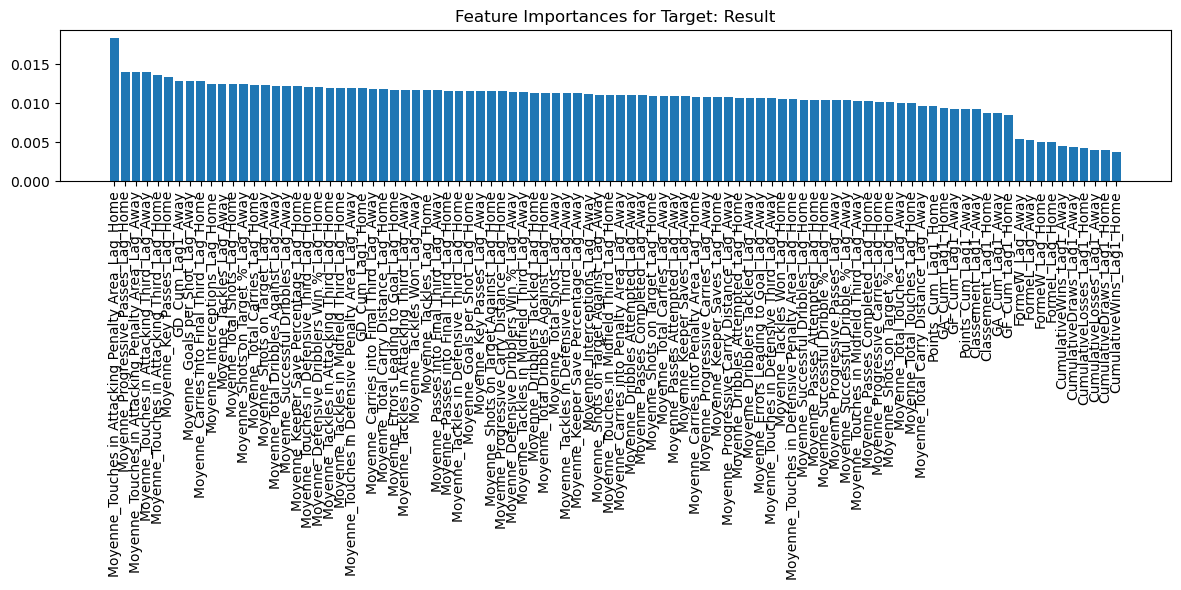

Précision de précision sur 'Result' avec RandomForest: 0.54


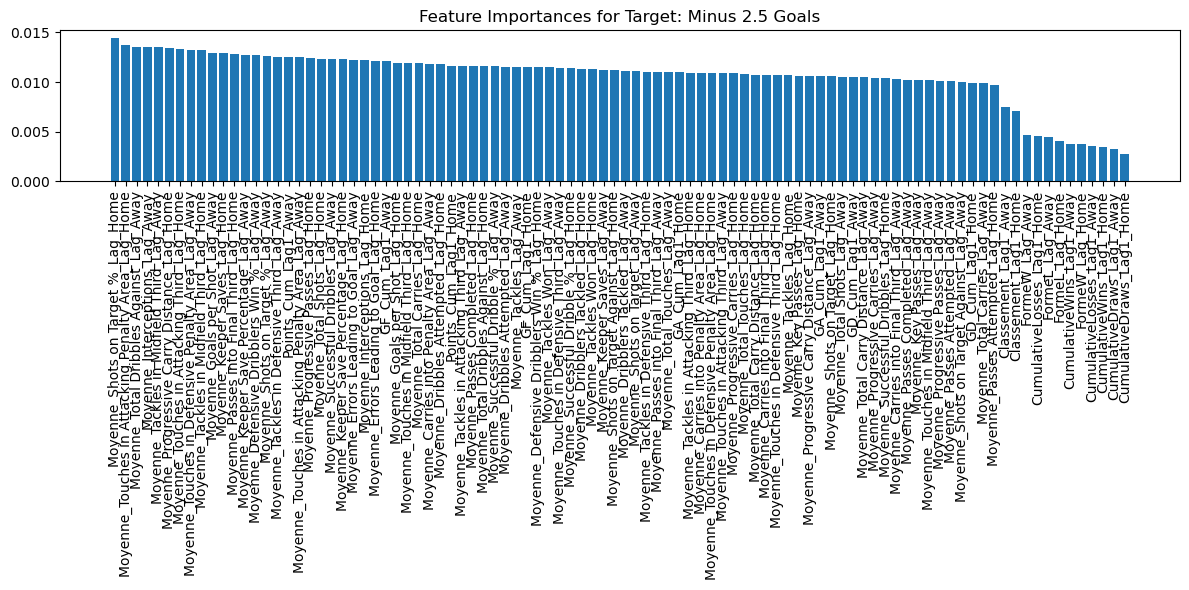

Précision de précision sur 'Minus 2.5 Goals' avec RandomForest: 0.46


In [ ]:
prédiction = modelisation(soccer_data, cutoff_date=datetime(2023, 9, 1), model_type="RandomForest" , plot_features=True)

En affichant les caractéristiques les plus importantes à l'aide du module Random Forest, nous constatons que toutes ont leur importance dans le modèle. Aucune ne semble avoir un poids significativement plus élevé qu'une autre, ce qui justifie l'inclusion d'un maximum de statistiques dans nos modèles pour une analyse plus complète et précise.

Néanmoins, lors de la prévision des résultats, une variable se distingue : la moyenne des touches de balle dans la surface adverse au cours des derniers matchs pour l'équipe à domicile. Cette variable, ainsi que son équivalent pour l'équipe à l'extérieur, s'avèrent être des indicateurs significatifs. Elles reflètent l'agressivité et la pression offensive des équipes, des aspects cruciaux pour prédire l'issue des rencontres. L'analyse de ces variables, couplée à d'autres statistiques, permet d'obtenir une prédiction plus nuancée et potentiellement plus précise des résultats des matchs.

La précision du Random Forest est nettement supérieur à notre première approche naîve puisqu'ici nous atteignons des taux de précisions de 54% ce qui est beaucoup mieux en terme de prévisions de matchs de football. La capacité à prédire s'il y'aura moins de 2.5 est nettement plus basse mais reste cohérente.

Examinons les matchs avec une probabilité de prédiction supérieure à 60% et comparons-les aux résultats réels.
Cette deuxième métrique permet d'affiner encore plus la séléctions des matchs.

In [ ]:
prédiction[prédiction["Prediction_Probability_Result"] >= 0.6]

,DateTime,Comp,Saison,Round,Day,Team Home,GF_Home,GF_Away,Team Away,Result,Predicted_Result,Prediction_Probability_Result,Predicted_Minus 2.5 Goals,Prediction_Probability_Minus 2.5 Goals,MatchID
1831,2023-12-16 21:00:00,Ligue 1,2023-2024,16,Sat,Lens,2,0,Reims,W_Home,W_Home,0.626667,0.0,0.683333,2023-12-16 21:00:00-Lens-vs-Reims
1835,2023-10-22 15:00:00,Ligue 1,2023-2024,9,Sun,Lille,1,0,Brest,W_Home,W_Home,0.680000,0.0,0.570000,2023-10-22 15:00:00-Brest-vs-Lille
1879,2023-11-05 17:05:00,Ligue 1,2023-2024,11,Sun,Monaco,2,0,Brest,W_Home,W_Home,0.656667,0.0,0.573333,2023-11-05 17:05:00-Brest-vs-Monaco
1880,2023-12-03 15:00:00,Ligue 1,2023-2024,14,Sun,Monaco,2,0,Montpellier,W_Home,W_Home,0.610000,0.0,0.573333,2023-12-03 15:00:00-Monaco-vs-Montpellier
1913,2023-10-21 17:00:00,Ligue 1,2023-2024,9,Sat,Paris Saint Germain,3,0,Strasbourg,W_Home,W_Home,0.610000,0.0,0.613333,2023-10-21 17:00:00-Paris Saint Germain-vs-Str...
1914,2023-11-03 21:00:00,Ligue 1,2023-2024,11,Fri,Paris Saint Germain,3,0,Montpellier,W_Home,W_Home,0.630000,0.0,0.623333,2023-11-03 21:00:00-Montpellier-vs-Paris Saint...
1916,2023-12-09 21:00:00,Ligue 1,2023-2024,15,Sat,Paris Saint Germain,2,1,Nantes,W_Home,W_Home,0.613333,0.0,0.623333,2023-12-09 21:00:00-Nantes-vs-Paris Saint Germain
1917,2023-12-20 21:00:00,Ligue 1,2023-2024,17,Wed,Paris Saint Germain,3,1,Metz,W_Home,W_Home,0.600000,0.0,0.653333,2023-12-20 21:00:00-Metz-vs-Paris Saint Germain
1931,2023-10-29 17:05:00,Ligue 1,2023-2024,10,Sun,Rennes,1,1,Strasbourg,D,W_Home,0.653333,0.0,0.500000,2023-10-29 17:05:00-Rennes-vs-Strasbourg
1933,2023-11-26 17:05:00,Ligue 1,2023-2024,13,Sun,Rennes,3,1,Reims,W_Home,W_Home,0.606667,0.0,0.543333,2023-11-26 17:05:00-Reims-vs-Rennes


Nous pouvons observer que l'algorithme effectue des prédictions très précises pour les matchs avec une probabilité élevée. Dans cet ensemble de données, seul un match a été incorrectement prédit. Cependant, il est clair que prédire une victoire à domicile est considérablement plus facile que de prédire un match nul ou une victoire à l'extérieur, malgré l'utilisation de la gestion des catégories dans l'estimation du modèle Random Forest.

**Poursuivons avec un modèle SVC** pour tenter de prédire les mêmes variables.

Le **Support Vector Classifier (SVC)** est choisi pour sa capacité à tracer une frontière de décision nette entre différentes classes, même dans des scénarios complexes où les relations entre les caractéristiques ne sont pas linéaires. Son usage est adapté à la prédiciton de matchs de football.


**Comparaison avec le Random Forest :**  

Différentes analyses sur notre base de donnée ont montré que le Random Forest est beaucoup plus éfficace en terme de prédiction sur le football que le SVM. Nous allons néanmoins montrer un exemple de l'usage de SVM et expliquer en quoi son utilisation est un problème.

In [ ]:
prédiction2 = modelisation(soccer_data, cutoff_date=datetime(2023, 9, 1), model_type="SVC", plot_features=True)

Précision de précision sur 'Result' avec SVC: 0.49
Précision de précision sur 'Minus 2.5 Goals' avec SVC: 0.45


Le modèle SVM s'en sort nettement moins bien puisqu'on retombe sur des résultats similaires à notre approche naîve autour de 50%.

In [ ]:
prédiction2[prédiction2["Prediction_Probability_Result"] >= 0.6]

,DateTime,Comp,Saison,Round,Day,Team Home,GF_Home,GF_Away,Team Away,Result,Predicted_Result,Prediction_Probability_Result,Predicted_Minus 2.5 Goals,Prediction_Probability_Minus 2.5 Goals,MatchID
1912,2023-09-24 20:45:00,Ligue 1,2023-2024,6,Sun,Paris Saint Germain,4,0,Marseille,W_Home,W_Home,0.688742,0.0,0.596704,2023-09-24 20:45:00-Marseille-vs-Paris Saint G...
1913,2023-10-21 17:00:00,Ligue 1,2023-2024,9,Sat,Paris Saint Germain,3,0,Strasbourg,W_Home,W_Home,0.743773,0.0,0.638223,2023-10-21 17:00:00-Paris Saint Germain-vs-Str...
1914,2023-11-03 21:00:00,Ligue 1,2023-2024,11,Fri,Paris Saint Germain,3,0,Montpellier,W_Home,W_Home,0.730892,0.0,0.642434,2023-11-03 21:00:00-Montpellier-vs-Paris Saint...
1915,2023-11-24 21:00:00,Ligue 1,2023-2024,13,Fri,Paris Saint Germain,5,2,Monaco,W_Home,W_Home,0.671022,0.0,0.620648,2023-11-24 21:00:00-Monaco-vs-Paris Saint Germain
1916,2023-12-09 21:00:00,Ligue 1,2023-2024,15,Sat,Paris Saint Germain,2,1,Nantes,W_Home,W_Home,0.682277,0.0,0.637468,2023-12-09 21:00:00-Nantes-vs-Paris Saint Germain
1917,2023-12-20 21:00:00,Ligue 1,2023-2024,17,Wed,Paris Saint Germain,3,1,Metz,W_Home,W_Home,0.737473,0.0,0.655782,2023-12-20 21:00:00-Metz-vs-Paris Saint Germain
1929,2023-10-01 20:45:00,Ligue 1,2023-2024,7,Sun,Rennes,3,1,Nantes,W_Home,W_Home,0.611301,0.0,0.621107,2023-10-01 20:45:00-Nantes-vs-Rennes


Dans notre analyse, il apparaît que tous les matchs sont correctement prédits. Cependant, parmi les 7 matchs ayant une probabilité de réalisation supérieure à 60%, 6 concernent le Paris Saint Germain. Bien que cela puisse indiquer une certaine fiabilité du modèle, cela révèle également une limitation significative : le modèle semble fortement biaisé en faveur des matchs impliquant cette équipe. Cela ne correspond pas à l'objectif de notre projet, qui est de fournir des prédictions fiables et équilibrées pour tous les matchs, indépendamment des équipes impliquées. En conséquence, nous choisissons de ne pas retenir le modèle SVC pour cette tâche mais plutôt le Random Forest qui s'en sort beaucoup mieux.



# Interface

Nous avons développé une interface utilisateur intuitive pour présenter les résultats obtenus. Cette interface propose trois fonctionnalités distinctes :

1. **Visualisation de Statistiques** : Cette option vous permet de personnaliser l'affichage des statistiques. Vous pouvez sélectionner une saison spécifique ou examiner toutes les saisons, choisir une équipe particulière ou toutes les équipes, et définir la statistique à visualiser. De plus, vous avez la flexibilité de filtrer ces statistiques (par match, saison, adversaire, etc.), de choisir entre afficher un total ou une moyenne, et de sélectionner le type de graphique souhaité (linéaire ou en barres). Il est important de choisir des paramètres cohérents pour assurer une réponse adéquate de l'interface.

2. **Exploration des Données** : Cette fonctionnalité vous permet de parcourir les données détaillées d'un match spécifique. En sélectionnant une saison, une équipe et une journée, vous accédez à un ensemble complet de statistiques pour le match choisi.

3. **Prédiction de Matchs** : Dans cette section, vous pouvez sélectionner un match de la prochaine journée à prédire. L'interface présentera d'abord des statistiques clés pour vous donner un aperçu de l'état des deux équipes. Ensuite, en cliquant sur le bouton de prédiction, vous obtiendrez le résultat prédit par notre modèle principal (deuxième approche), ainsi que le niveau de confiance associé à cette prédiction.

Chaque fonctionnalité est conçue pour offrir une expérience utilisateur enrichissante et informative, adaptée à vos besoins en matière d'analyse de données sportives.

On prépare les fichiers dont on a besoin dans notre interface:

In [ ]:
# Chargement des données historiques et préparation de la base de données
df_resultats = pd.read_csv('Database/results.csv')
first_round = df_resultats['Round'].max()
df_2324, affiches = fonction_resultats(2023)
df_2324 = df_2324[df_2324['Journée'] <= first_round]
df_2324 = fonction_prepa_base(df_2324, 1)

# Concaténation avec l'historique des données
df_hist = pd.read_csv('Database/dataframe_final.csv', encoding='utf-8')
df_hist = pd.concat([df_hist, df_2324[df_2324['Journée'] <= first_round-1]])

# Ajout de la colonne 'Historique'
df_hist['Historique'] = df_hist.groupby(['Equipe 1', 'Equipe 2'])['Résultat'].cumsum() - df_hist['Résultat']

# Chargement des données de prédiction et des statistiques
df_pred = pd.read_csv('Database/results.csv')
df_stats = pd.read_csv('Database/dynamic_soccer_database.csv')

# Prétraitement et renommage des colonnes dans les statistiques
mapping_equipe = {
    'Nimes': 'Nîmes',
    'Paris S-G': 'Paris Saint Germain',
    'Saint-Étienne': 'ASSE'
}
df_stats = renommer_colonnes(preprocess_initial(df_stats, mapping_equipe))

# Conversion des types de données pour 'GF' et 'GA', et ajout des colonnes 'Victoire', 'Défaite' et 'Nul'
df_stats[['GF', 'GA']] = df_stats[['GF', 'GA']].astype(float).astype(int)
df_stats.insert(0, 'Victoire', df_stats['Result'].apply(lambda x: 1 if x == 'W' else 0))
df_stats.insert(1, 'Défaite', df_stats['Result'].apply(lambda x: 1 if x == 'L' else 0))
df_stats.insert(2, 'Nul', df_stats['Result'].apply(lambda x: 1 if x == 'D' else 0))
df_stats.drop(['Result'], axis=1, inplace=True)


/home/onyxia/work/Projet-python/fonctions.py:627: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0].dropna(subset = 'Wk').reset_index(drop=True)
/home/onyxia/work/Projet-python/fonctions.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  affiches[['Home', 'Away']] = affiches[['Home', 'Away']].replace('Paris S-G', 'Paris Saint Germain')


Pour utiliser l'interface lancez la cellule ci-dessous :

**ATTENTION, l'interface ne se lancera que si vous disposez d'un environnement capable de gérer TKinter**

Les environnement comme Onyxia avec SSPCloud ne permettent pas de faire fonctionner l'interface.

In [ ]:
def fonction_accueil(widget_to_destroy, bouton_accueil):

    for widget in widget_to_destroy:
        widget.destroy()
    bouton_accueil.destroy()

    image_intro = Image.open('Logos\\Logo_Ligue_1_Uber_Eats_2022.png')
    image_intro = image_intro.resize((130, 180), Image.LANCZOS)
    photo_intro = ImageTk.PhotoImage(image_intro)
    frame_intro = tk.Frame(window)
    label_image_intro = tk.Label(frame_intro, image=photo_intro)
    label_image_intro.image = photo_intro
    label_image_intro.grid(row=0, column=1)

    frame_intro.pack(expand=True, anchor="n")

    choix_combobox = ttk.Combobox(frame_intro, values=['Visualisez des stats', 'Parcourir les données', 'Prédire un résultat de la prochaine journée'], state="readonly")
    choix_combobox.set("Que voulez vous faire ?")
    choix_combobox.grid(row=1, column=1, padx=10, pady=10)
    choix_combobox.bind("<<ComboboxSelected>>", lambda e: fonction_choix(frame_intro, choix_combobox, e))



def fonction_choix(label_choix, choix_combobox, event):
    sélection = choix_combobox.get()
    if sélection == 'Visualisez des stats':
        fonction_choix_saison(label_choix, choix_combobox, event = None)
    elif sélection == 'Prédire un résultat de la prochaine journée':
        fonction_predictions(label_choix, choix_combobox, event = None)
    else:
        fonction_stats(label_choix, choix_combobox, event = None)

def fonction_choix_saison(frame_intro, choix_combobox, event):
    choix_combobox.destroy()

    choix_saisons = df_stats['Saison'].unique().tolist()
    choix_saisons =  choix_saisons[:] + ['Toutes les saisons'] 
    saison_combobox = ttk.Combobox(frame_intro, values=choix_saisons, state="readonly")
    saison_combobox.set("Choisir une saison")
    saison_combobox.grid(row=1, column=1, padx=10, pady=10)
    saison_combobox.bind("<<ComboboxSelected>>", lambda e: fonction_choix_equipe(frame_intro, saison_combobox, e))


def fonction_choix_equipe(frame_intro, saison_combobox, e):
    saison = saison_combobox.get()

    if saison == 'Toutes les saisons':
        choix_equipe = df_stats['Team'].unique().tolist()
    else:
        choix_equipe = df_stats[df_stats['Saison'] == saison]['Team'].unique().tolist()
    choix_equipe =  choix_equipe[:] + ['Toutes les équipes']
    equipe_combobox = ttk.Combobox(frame_intro, values=choix_equipe, state="readonly")
    equipe_combobox.set("Choisir une équipe")
    equipe_combobox.grid(row=2, column=1, padx=10, pady=10)
    equipe_combobox.bind("<<ComboboxSelected>>", lambda e: fonction_choix_stats(frame_intro, saison_combobox, equipe_combobox, saison, e))


def fonction_choix_stats(frame_intro, saison_combobox, equipe_combobox, saison, e):
    equipe = equipe_combobox.get()


    

    choix_stats =  [elem for elem in df_stats.columns if elem not in ['Saison', 'Goals Scored', 'Team', 'Opponent', 'DateTime', 'Unnamed: 0', 'Comp', 'Round', 
                                                                      'Day', 'Venue', 'Attendance', 'Captain', 'Formation', 'Referee', 'Match Report', 
                                                                      'Notes', 'MatchID']]
    stats_combobox = ttk.Combobox(frame_intro, values=choix_stats, state="readonly")
    stats_combobox.set("Choisir une stat")
    stats_combobox.grid(row=3, column=1, padx=10, pady=10)
    stats_combobox.bind("<<ComboboxSelected>>", lambda e: fonction_choix_filtre(frame_intro, saison_combobox, equipe_combobox,
                                                                                stats_combobox, saison, equipe, e))


def fonction_choix_filtre( frame_intro, saison_combobox, equipe_combobox, stats_combobox, saison, equipe, e):
    stats = stats_combobox.get()

    choix_filtre =  [elem for elem in df_stats.columns if elem in ['Saison', 'Team', 'Round', 'Opponent', 'Venue', 'Formation']]
    filtre_combobox = ttk.Combobox(frame_intro, values=choix_filtre, state="readonly")
    filtre_combobox.set("Choisir un filtre")
    filtre_combobox.grid(row=4, column=1, padx=10, pady=10)
    filtre_combobox.bind("<<ComboboxSelected>>", lambda e: fonction_choix_type(frame_intro, saison_combobox , equipe_combobox, stats_combobox, 
                                                                                filtre_combobox, saison, equipe, stats, e))

def fonction_choix_type( frame_intro, saison_combobox , equipe_combobox, stats_combobox, filtre_combobox, saison, equipe, stats, e):
    filtre = filtre_combobox.get()


    choix_type =  ['Somme', 'Moyenne']
    type_combobox = ttk.Combobox(frame_intro, values=choix_type, state="readonly")
    type_combobox.set("Choisir un type de stats")
    type_combobox.grid(row=5, column=1, padx=10, pady=10)
    type_combobox.bind("<<ComboboxSelected>>", lambda e: fonction_choix_graph(frame_intro, saison_combobox,  equipe_combobox, stats_combobox, 
                                                                              filtre_combobox, type_combobox, saison, equipe, stats, filtre, e))

def fonction_choix_graph(frame_intro, saison_combobox,  equipe_combobox, stats_combobox, 
                         filtre_combobox, type_combobox, saison, equipe, stats, filtre, e):
    type = type_combobox.get()


    choix_graph =  ['Linéaire', 'Barres']
    graph_combobox = ttk.Combobox(frame_intro, values=choix_graph, state="readonly")
    graph_combobox.set("Choisir un graph")
    graph_combobox.grid(row=6, column=1, padx=10, pady=10)
    graph_combobox.bind("<<ComboboxSelected>>", lambda e: fonction_affichage(frame_intro, graph_combobox, saison, equipe, stats, filtre, type, e))

def fonction_affichage(frame_intro, graph_combobox, saison, equipe, stats, filtre, type, e):
    graph = graph_combobox.get()

    frame_intro.destroy()

    if saison == 'Toutes les saisons':
        if equipe == 'Toutes les équipes':
            df_plot = df_stats
        else:   
            df_plot = df_stats[(df_stats['Team'] == str(equipe))]
    else:
        if equipe == 'Toutes les équipes':
            df_plot = df_stats[(df_stats['Saison'] == str(saison))]
        else:
            df_plot = df_stats[(df_stats['Team'] == str(equipe)) & (df_stats['Saison'] == str(saison))]
    if type == 'Somme':
        if graph == 'Linéaire':
            plot = df_plot.groupby(str(filtre))[str(stats)].sum().reset_index()

            figure = Figure(figsize = (15,6), dpi=100)
            subplot = figure.add_subplot(1, 1, 1)


            subplot.plot(plot[str(filtre)], plot[str(stats)], marker='o', linestyle='-')
            subplot.set_title('Évolution de ' + str(stats) + ' de ' + str(equipe) + ' en fonction de ' + str(filtre))
            subplot.set_xlabel(str(filtre))
            subplot.set_ylabel(str(stats))
            subplot.set_xticks(range(len(plot[str(filtre)])))
            subplot.set_xticklabels(plot[str(filtre)], rotation=45, ha='right')
            subplot.grid(True)

            canvas = FigureCanvasTkAgg(figure, master=window)
            canvas.draw()
            canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

        if graph == 'Barres':
            plot = df_plot.groupby(str(filtre))[str(stats)].sum().reset_index()

            figure = Figure(figsize = (15,6), dpi=100)
            subplot = figure.add_subplot(1, 1, 1)


            subplot.bar(plot[str(filtre)], plot[str(stats)], color = 'blue')
            subplot.set_title('Nombre de ' + str(stats) + ' de ' + str(equipe) + ' en fonction de ' + str(filtre))
            subplot.set_xlabel(str(filtre))
            subplot.set_ylabel(str(stats))
            subplot.set_xticks(range(len(plot[str(filtre)])))
            subplot.set_xticklabels(plot[str(filtre)], rotation=45, ha='right')
            subplot.grid(True)

            canvas = FigureCanvasTkAgg(figure, master=window)
            canvas.draw()
            canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
    else:
        if graph == 'Linéaire':
            plot = df_plot.groupby(str(filtre))[str(stats)].mean().reset_index()

            figure = Figure(figsize = (15,6), dpi=100)
            subplot = figure.add_subplot(1, 1, 1)


            subplot.plot(plot[str(filtre)], plot[str(stats)], marker='o', linestyle='-')
            subplot.set_title('Évolution de ' + str(stats) + ' de ' + str(equipe) + ' en fonction de ' + str(filtre))
            subplot.set_xlabel(str(filtre))
            subplot.set_ylabel(str(stats))
            subplot.set_xticks(range(len(plot[str(filtre)])))
            subplot.set_xticklabels(plot[str(filtre)], rotation=45, ha='right')
            subplot.grid(True)

            canvas = FigureCanvasTkAgg(figure, master=window)
            canvas.draw()
            canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

        if graph == 'Barres':
            plot = df_plot.groupby(str(filtre))[str(stats)].mean().reset_index()

            figure = Figure(figsize = (15,6), dpi=100)
            subplot = figure.add_subplot(1, 1, 1)


            subplot.bar(plot[str(filtre)], plot[str(stats)], color = 'blue')
            subplot.set_title('Nombre de ' + str(stats) + ' de ' + str(equipe) + ' en fonction de ' + str(filtre))
            subplot.set_xlabel(str(filtre))
            subplot.set_ylabel(str(stats))
            subplot.set_xticks(range(len(plot[str(filtre)])))
            subplot.set_xticklabels(plot[str(filtre)], rotation=45, ha='right')
            subplot.grid(True)

            canvas = FigureCanvasTkAgg(figure, master=window)
            canvas.draw()
            canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    bouton_accueil = ttk.Button(window, text="Revenir à la page d'accueil", command=lambda: fonction_accueil([canvas.get_tk_widget()], bouton_accueil))
    bouton_accueil.pack(side=tk.BOTTOM)


def fonction_predictions(frame_intro, choix_combobox, event):
    choix_combobox.destroy()

    choix_match = [match for match, wk in zip(df_resultats['Team Home'] + ' - ' + df_resultats['Team Away'], df_resultats['Round']) if wk == first]
    match_combobox = ttk.Combobox(frame_intro, values=choix_match, state="readonly")
    match_combobox.set("Choisir un match")
    match_combobox.grid(row=1, column=1, padx=10, pady=10)
    match_combobox.bind("<<ComboboxSelected>>", lambda e: fonction_affichage_pred(frame_intro, match_combobox, e))


def fonction_affichage_pred(frame_intro, match_combobox, e):
    match = match_combobox.get()
    frame_intro.destroy()


    frame_tableau1 = tk.Frame(window)
    frame_tableau1.pack(expand=True, side = 'left', pady = 200)
    frame_tableau2 = tk.Frame(window)
    frame_tableau2.pack(expand=True, side = 'right', pady = 200)

    equipe1 = match.split(' - ')[0].strip()
    equipe2 = match.split(' - ')[1].strip()

    df_match1 = fonction_tableau_stats(df_2324, first, equipe1, 'Domicile')
    df_match2 = fonction_tableau_stats(df_2324, first, equipe2, 'Extérieur')

    try:
        a = str(int(df_hist[(df_hist['Equipe 1'] == equipe1) & (df_hist['Equipe 2'] == equipe2)]['Résultat'].value_counts()[1]))
    except Exception as e:
        a = '0'
    try:
        b = str(int(df_hist[(df_hist['Equipe 1'] == equipe1) & (df_hist['Equipe 2'] == equipe2)]['Résultat'].value_counts()[0]))
    except Exception as e:
        b = '0'
    try:
        c = str(int(df_hist[(df_hist['Equipe 1'] == equipe1) & (df_hist['Equipe 2'] == equipe2)]['Résultat'].value_counts()[-1]))
    except Exception as e:
        c = '0'

    df_match1['Historique'] = a + 'V ' + b + 'N ' + c + 'D'
    df_match2['Historique'] = c + 'V ' + b + 'N ' + a + 'D'

    for i, (col_name, value) in enumerate(df_match1.iloc[0].items()):
        if col_name == 'Classement':
            value = int(value)
        label_title = tk.Label(frame_tableau1, text=f"{col_name}:", padx=10, pady=5, borderwidth=1, relief="solid", anchor="w", width=30)
        label_title.grid(row=i+3, column=0, sticky="w")

        label_value = tk.Label(frame_tableau1, text=value, padx=10, pady=5, borderwidth=1, relief="solid", anchor="w", width=20)
        label_value.grid(row=i+3, column=1, sticky="w")

    for i, (col_name, value) in enumerate(df_match2.iloc[0].items()):
        if col_name == 'Classement':
            value = int(value)
        label_title = tk.Label(frame_tableau2, text=f"{col_name}:", padx=10, pady=5, borderwidth=1, relief="solid", anchor="w", width=30)
        label_title.grid(row=i+3, column=0, sticky="w")

        label_value = tk.Label(frame_tableau2, text=value, padx=10, pady=5, borderwidth=1, relief="solid", anchor="w", width=20)
        label_value.grid(row=i+3, column=1, sticky="w")


    image_path1 = trouver_chemins_images_avec_mot_cle('Logos\\', equipe1)
    image1 = Image.open(image_path1)
    image1 = image1.resize((100, 120), Image.LANCZOS)  
    photo1 = ImageTk.PhotoImage(image1)

    label_image1 = tk.Label(frame_tableau1, image=photo1)
    label_image1.image = photo1  
    label_image1.grid(row=0, column=0, columnspan=4, pady = 30)

    image_path2 = trouver_chemins_images_avec_mot_cle('Logos\\', equipe2)
    image2 = Image.open(image_path2)
    image2 = image2.resize((100, 120), Image.LANCZOS)  
    photo2 = ImageTk.PhotoImage(image2)

    label_image2 = tk.Label(frame_tableau2, image=photo2)
    label_image2.image = photo2  
    label_image2.grid(row=0, column=0, columnspan=4, pady=30)

    image_intro = Image.open('Logos\\Logo_Ligue_1_Uber_Eats_2022.png')
    image_intro = image_intro.resize((130, 180), Image.LANCZOS)
    photo_intro = ImageTk.PhotoImage(image_intro)
    frame_intro = tk.Frame(window)
    label_image_intro = tk.Label(frame_intro, image=photo_intro)
    label_image_intro.image = photo_intro
    label_image_intro.grid(row=0, column=1)

    frame_intro.pack(anchor="n")

    bouton_predictions = tk.Button(frame_intro, text="Prédictions", command=lambda: fonction_predictions_final(frame_intro, equipe1, equipe2, frame_tableau1, frame_tableau2, bouton_predictions, event = None))
    bouton_predictions.grid(row=1, column=1, pady =500)

def fonction_predictions_final(frame_intro, equipe1, equipe2, frame_tableau1, frame_tableau2, bouton_prediction, event):
    bouton_prediction.destroy()
    frame_tableau1.destroy()
    frame_tableau2.destroy()

    texte_1 = tk.Label(window, text='Prédiction:', font=("Helvetica", 24, "bold"))
    texte_1.pack(anchor='center', padx=0, pady=70)

    if df_pred[(df_pred['Team Home'] == equipe1) & (df_pred['Team Away'] == equipe2)]['Predicted_Result'].values[0] == 'D':
        texte_2 = tk.Label(window, text='Match Nul', font=("Helvetica", 24, "bold"))
        texte_2.pack(anchor='center', padx=0, pady=10)
    elif df_pred[(df_pred['Team Home'] == equipe1) & (df_pred['Team Away'] == equipe2)]['Predicted_Result'].values[0] == 'W_Home':
        texte_2 = tk.Label(window, text='Victoire de: ' + str(equipe1), font=("Helvetica", 24, "bold"))
        texte_2.pack(anchor='center', padx=0, pady=10)
    else:
        texte_2 = tk.Label(window, text='Victoire de: ' + str(equipe2), font=("Helvetica", 24, "bold"))
        texte_2.pack(anchor='center', padx=0, pady=10)

    texte_3 = tk.Label(window, text='Avec Probabilité: ' + str(df_pred[(df_pred['Team Home'] == equipe1) & (df_pred['Team Away'] == equipe2)]['Prediction_Probability_Result'].values[0]), font=("Helvetica", 24, "bold"))
    texte_3.pack(anchor='center', padx=0, pady=10)

    if df_pred[(df_pred['Team Home'] == equipe1) & (df_pred['Team Away'] == equipe2)]['Predicted_Minus 2.5 Goals'].values[0] == 1:
        texte_4 = tk.Label(window, text='Plus d\'un but dans le match:  Oui', font=("Helvetica", 24, "bold"))
        texte_4.pack(anchor='center', padx=0, pady=10)
    else:
        texte_4 = tk.Label(window, text='Plus d\'un but dans le match: Non', font=("Helvetica", 24, "bold"))
        texte_4.pack(anchor='center', padx=0, pady=10)

    texte_5 = tk.Label(window, text='Avec Probabilité: ' + str(df_pred[(df_pred['Team Home'] == equipe1) & (df_pred['Team Away'] == equipe2)]['Prediction_Probability_Minus 2.5 Goals'].values[0]), font=("Helvetica", 24, "bold"))
    texte_5.pack(anchor='center', padx=0, pady=10)

    bouton_accueil = ttk.Button(window, text="Revenir à la page d'accueil", command=lambda: fonction_accueil([frame_intro, texte_1, texte_2, texte_3, texte_4, texte_5], bouton_accueil))
    bouton_accueil.pack(side=tk.BOTTOM)


def fonction_stats(frame_intro, choix_combobox, event):
    choix_combobox.destroy()

    choix_saisons = df_stats['Saison'].unique().tolist()
    choix_saisons =  choix_saisons[:]
    saison_combobox = ttk.Combobox(frame_intro, values=choix_saisons, state="readonly")
    saison_combobox.set("Choisir une saison")
    saison_combobox.grid(row=1, column=1, padx=10, pady=10)
    saison_combobox.bind("<<ComboboxSelected>>", lambda e: fonction_choix_equipe_stats(frame_intro, saison_combobox, e))

def fonction_choix_equipe_stats(frame_intro, saison_combobox, e):
    saison = saison_combobox.get()

    choix_equipe = df_stats[df_stats['Saison'] == saison]['Team'].unique().tolist()
    choix_equipe =  choix_equipe[:]
    equipe_combobox = ttk.Combobox(frame_intro, values=choix_equipe, state="readonly")
    equipe_combobox.set("Choisir une équipe")
    equipe_combobox.grid(row=2, column=1, padx=10, pady=10)
    equipe_combobox.bind("<<ComboboxSelected>>", lambda e: fonction_choix_journee_stats(frame_intro, saison_combobox, equipe_combobox, saison, e))

def fonction_choix_journee_stats(frame_intro, saison_combobox, equipe_combobox, saison, e):
    equipe = equipe_combobox.get()

    choix_journee = df_stats[(df_stats['Saison'] == saison) & (df_stats['Team'] == equipe)]['Round'].unique().tolist()
    choix_journee =  choix_journee[:]
    journee_combobox = ttk.Combobox(frame_intro, values=choix_journee, state="readonly")
    journee_combobox.set("Choisir une journée")
    journee_combobox.grid(row=3, column=1, padx=10, pady=10)
    journee_combobox.bind("<<ComboboxSelected>>", lambda e: fonction_affichage_stats(frame_intro, saison_combobox, equipe_combobox, journee_combobox, saison, equipe, e))

def fonction_affichage_stats(frame_intro, saison_combobox, equipe_combobox, journee_combobox, saison, equipe, e):
    journee = journee_combobox.get()

    frame_intro.destroy()

    df_stats_unique = df_stats[(df_stats['Saison'] == saison) & (df_stats['Team'] == equipe) & (df_stats['Round'] == int(journee))].drop(['Victoire', 'Défaite', 'Unnamed: 0', 'Notes', 'Match Report', 'Nul', 'DateTime', 'Saison','MatchID', 'Team', 'Comp'] , axis=1).copy()
    
    bouton_accueil = ttk.Button(window, text="Revenir à la page d'accueil", command=lambda: fonction_accueil([frame_tableau1, frame_tableau2, frame_tableau3], bouton_accueil))
    bouton_accueil.pack(side=tk.BOTTOM)

    frame_tableau1 = tk.Frame(window)
    frame_tableau1.pack(expand=True, side = 'left', anchor="center")



    for i, (col_name, value) in enumerate(df_stats_unique.iloc[0, :20].items()):
        label_title = tk.Label(frame_tableau1, text=f"{col_name}:", padx=10, pady=5, borderwidth=1, relief="solid", anchor="w", width=30)
        label_title.grid(row=i+3, column=0, sticky="w")

        label_value = tk.Label(frame_tableau1, text=value, padx=10, pady=5, borderwidth=1, relief="solid", anchor="w", width=20)
        label_value.grid(row=i+3, column=1, sticky="w")
    

    frame_tableau2 = tk.Frame(window)
    frame_tableau2.pack(expand=True, side= 'left', anchor="center", padx=35)


    for i, (col_name, value) in enumerate(df_stats_unique.iloc[0, 20:40].items()):
        label_title = tk.Label(frame_tableau2, text=f"{col_name}:", padx=10, pady=5, borderwidth=1, relief="solid", anchor="w", width=30)
        label_title.grid(row=i+3, column=0, sticky="w")

        label_value = tk.Label(frame_tableau2, text=value, padx=10, pady=5, borderwidth=1, relief="solid", anchor="w", width=20)
        label_value.grid(row=i+3, column=1, sticky="w")
    
    frame_tableau3 = tk.Frame(window)
    frame_tableau3.pack(expand=True, side= 'right', anchor="center")


    for i, (col_name, value) in enumerate(df_stats_unique.iloc[0, 40:60].items()):
        label_title = tk.Label(frame_tableau3, text=f"{col_name}:", padx=10, pady=5, borderwidth=1, relief="solid", anchor="w", width=30)
        label_title.grid(row=i+3, column=0, sticky="w")

        label_value = tk.Label(frame_tableau3, text=value, padx=10, pady=5, borderwidth=1, relief="solid", anchor="w", width=20)
        label_value.grid(row=i+3, column=1, sticky="w")
    



def toggle_fullscreen(event=None):
    state = not window.attributes('-fullscreen')
    window.attributes('-fullscreen', state)

window = tk.Tk()
window.title("Choix de l'utilisateur")
window.bind('<Escape>', toggle_fullscreen)
window.attributes('-fullscreen', True)


image_intro = Image.open('Logos\\Logo_Ligue_1_Uber_Eats_2022.png')
image_intro = image_intro.resize((130, 180), Image.LANCZOS)
photo_intro = ImageTk.PhotoImage(image_intro)
frame_intro = tk.Frame(window)
label_image_intro = tk.Label(frame_intro, image=photo_intro)
label_image_intro.image = photo_intro
label_image_intro.grid(row=0, column=1)

frame_intro.pack(expand=True, anchor="n")


choix_combobox = ttk.Combobox(frame_intro, values=['Visualisez des stats', 'Parcourir les données', 'Prédire un résultat de la prochaine journée'], state="readonly")
choix_combobox.set("Que voulez vous faire?")
choix_combobox.grid(row=1, column=1, padx=10, pady=10)
choix_combobox.bind("<<ComboboxSelected>>", lambda e: fonction_choix(frame_intro, choix_combobox, e))


window.mainloop()



TclError: no display name and no $DISPLAY environment variable

# Conclusion du Projet de Prédiction des Résultats de Football

**Collecte de Données** : Nous avons initié ce projet ambitieux en mettant en place un système automatisé de scraping sur fbref, une étape fondamentale qui nous a permis de récolter des données détaillées sur les matchs de Ligue 1. Cette démarche a constitué la pierre angulaire de notre approche et a alimenté efficacement nos analyses et prédictions.

**Défis Rencontrés** :
- **Nature Imprévisible du Football** : Tout au long du projet, nous avons fait face à des défis comparables à ceux rencontrés dans des domaines volatils tels que la finance, en raison de l'aspect imprédictible et dynamique du football.
- **Limites des Données** : Un obstacle majeur a été l'absence d'informations sur la disponibilité des joueurs clés, ce qui a restreint notre capacité à prédire précisément les résultats des matchs.

**Résultats Encourageants** :
- Malgré ces défis, les résultats obtenus sont prometteurs. Ils offrent une base solide pour poursuivre le développement et l'amélioration de notre modèle de prédiction.

**Perspectives d'Amélioration** :
- **Extension des Bases de Données** : L'intégration de données issues d'autres championnats majeurs tels que la Premier League, La Liga et la Serie A, pourrait enrichir notre base de données et élargir notre analyse.
- **Analyse de Sentiments** : Incorporer une analyse des sentiments avant les matchs permettrait de mieux comprendre le moral et l'état d'esprit des équipes et des supporters, ce qui pourrait affiner davantage nos prédictions.
- **Données Spécifiques aux Joueurs** : L'ajout de données détaillées sur les joueurs constitue une piste d'amélioration, bien qu'elle complexifie la modélisation.

**Conclusion Générale** :
- Ce projet a posé les jalons d'une approche plus nuancée et complète pour la prédiction des résultats de football tout en l'automatisant pour avoir un suivi quotidien des résultats du modèle. Cela a mis en évidence les défis inhérents à ce domaine passionnant et a ouvert des voies prometteuses pour des développements futurs. 